In [1]:
#LETS JUST FOCUS ON VISSIES

#We need to register MJD of each excel file we ingest
#Each injest needs to be indentifiable with the MJD.

#Test single plots only.

import matplotlib.pyplot as plt
import glob
import astropy
import importlib
import math
import numpy as np
import xlwt
import xlsxwriter
import warnings
import pickle
warnings.filterwarnings('ignore')

from xlwt import Workbook
from astropy.time import Time
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

def single_plot_mean_pol_d( pold_dat , pold_dat_err, arg_m):
    fig, ax = plt.subplots()
    
    markers, caps, bars = ax.errorbar([0, 1, 2], 
                                      [np.mean(pold_dat[:30]),
                                       np.mean(pold_dat[31:37]), 
                                       np.mean(pold_dat[37:])],
                                      yerr=[ np.mean(pold_dat_err[:30]), 
                                       np.mean(pold_dat_err[31:37]), 
                                       np.mean(pold_dat_err[37:])] , 
                                      xerr =[0]*3,
                        fmt='o', ecolor='blue',capsize=2, capthick=2)

    if(arg_m=='PD'):
        plt.title('Mean Polarization Degree (PD)', fontsize=32)
        plt.ylabel('Mean PD, (%)', fontsize=28)
    elif(arg_m=='PA'):
        plt.title('Mean Position Angle (PA)', fontsize=32)
        plt.ylabel('Mean PA, ('+u'\N{DEGREE SIGN}'+')', fontsize=28)
    
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    plt.xlabel('N', fontsize=28)

    
    ax.text(0 , np.mean(pold_dat[:30]), "On eclipse"  , rotation = 45, fontsize = 32  )
    ax.text(1 , np.mean(pold_dat[31:37]), "Off eclipse"  , rotation = 45, fontsize = 32  )
    ax.text(2 , np.mean(pold_dat[37:]), "0.2 phase"  , rotation = 45, fontsize = 32  )

    ax.grid()

    [bar.set_alpha(0.2) for bar in bars]
    [cap.set_alpha(0.6) for cap in caps]

In [2]:
#Load all data. With 2021 Data
#2022-02-01
#Interrogative. There may be some things unaccountable for
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader()

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")
print(len(target_data)+len(zero_pol_data)+len(high_pol_data), "total")

master_list = target_data+zero_pol_data+high_pol_data
print(len(master_list))

#The function that calibs all the shit
calib_d = funcs_calib_and_plot.calib_pipe(target_data, zero_pol_data, False, False)

(EECep_pd, EECep_pd_err, EECep_PD_MJD_track)=funcs_polarimetry.calc_PD_stability(calib_d , 'perc', './img_out/stability/calEE_Cep_PD_stab', False,False, False, True, True, 'EECEP')
(EECep_pa, EECep_pa_err, EECep_PA_MJD_track)=funcs_polarimetry.calc_PA_stability(calib_d , 'degree', './img_out/stability/calEE_Cep_PD_stab', False,False, False, True, True, 'EECEP', True)

Load all excel data
41 targets
29 zero pols
50 high pols
120 total
120
Calibrating data...
Calibrating data...
Calibrating data...
Calibrating data...
Calibrating data...
Calc Polarization Degree stability
Calc Position Angle stability
Shifting PA...


In [3]:
#funcs_polarimetry.plot_pol_stab(EECep_PA_MJD_track, EECep_pa, EECep_pa_err, False,'PA')

In [4]:
EECep_PD_MJD_track

<Time object: scale='utc' format='mjd' value=[58913.81344676 58922.78325648 58923.75659711 58932.83197853
 58933.78986418 58935.02764398 58940.06977002 58940.96967708
 58941.78031661 58944.09940874 58945.09941065 58945.97238125
 58946.88202714 58947.96324115 58955.02866227 58956.00805648
 58957.90564606 58958.87942986 58960.99852037 58962.03068837
 58963.01625312 58966.84672622 58967.9974537  58969.86124531
 58970.98581499 58973.95327037 58976.06242124 58982.05153762
 58982.05163507 58989.99448142 59003.93817477 59059.98128206
 59087.01971308 59101.96008484 59114.81984936 59131.03620324
 59150.76178953 59311.09911782 59340.00948796 59354.9925
 59360.0113739 ]>

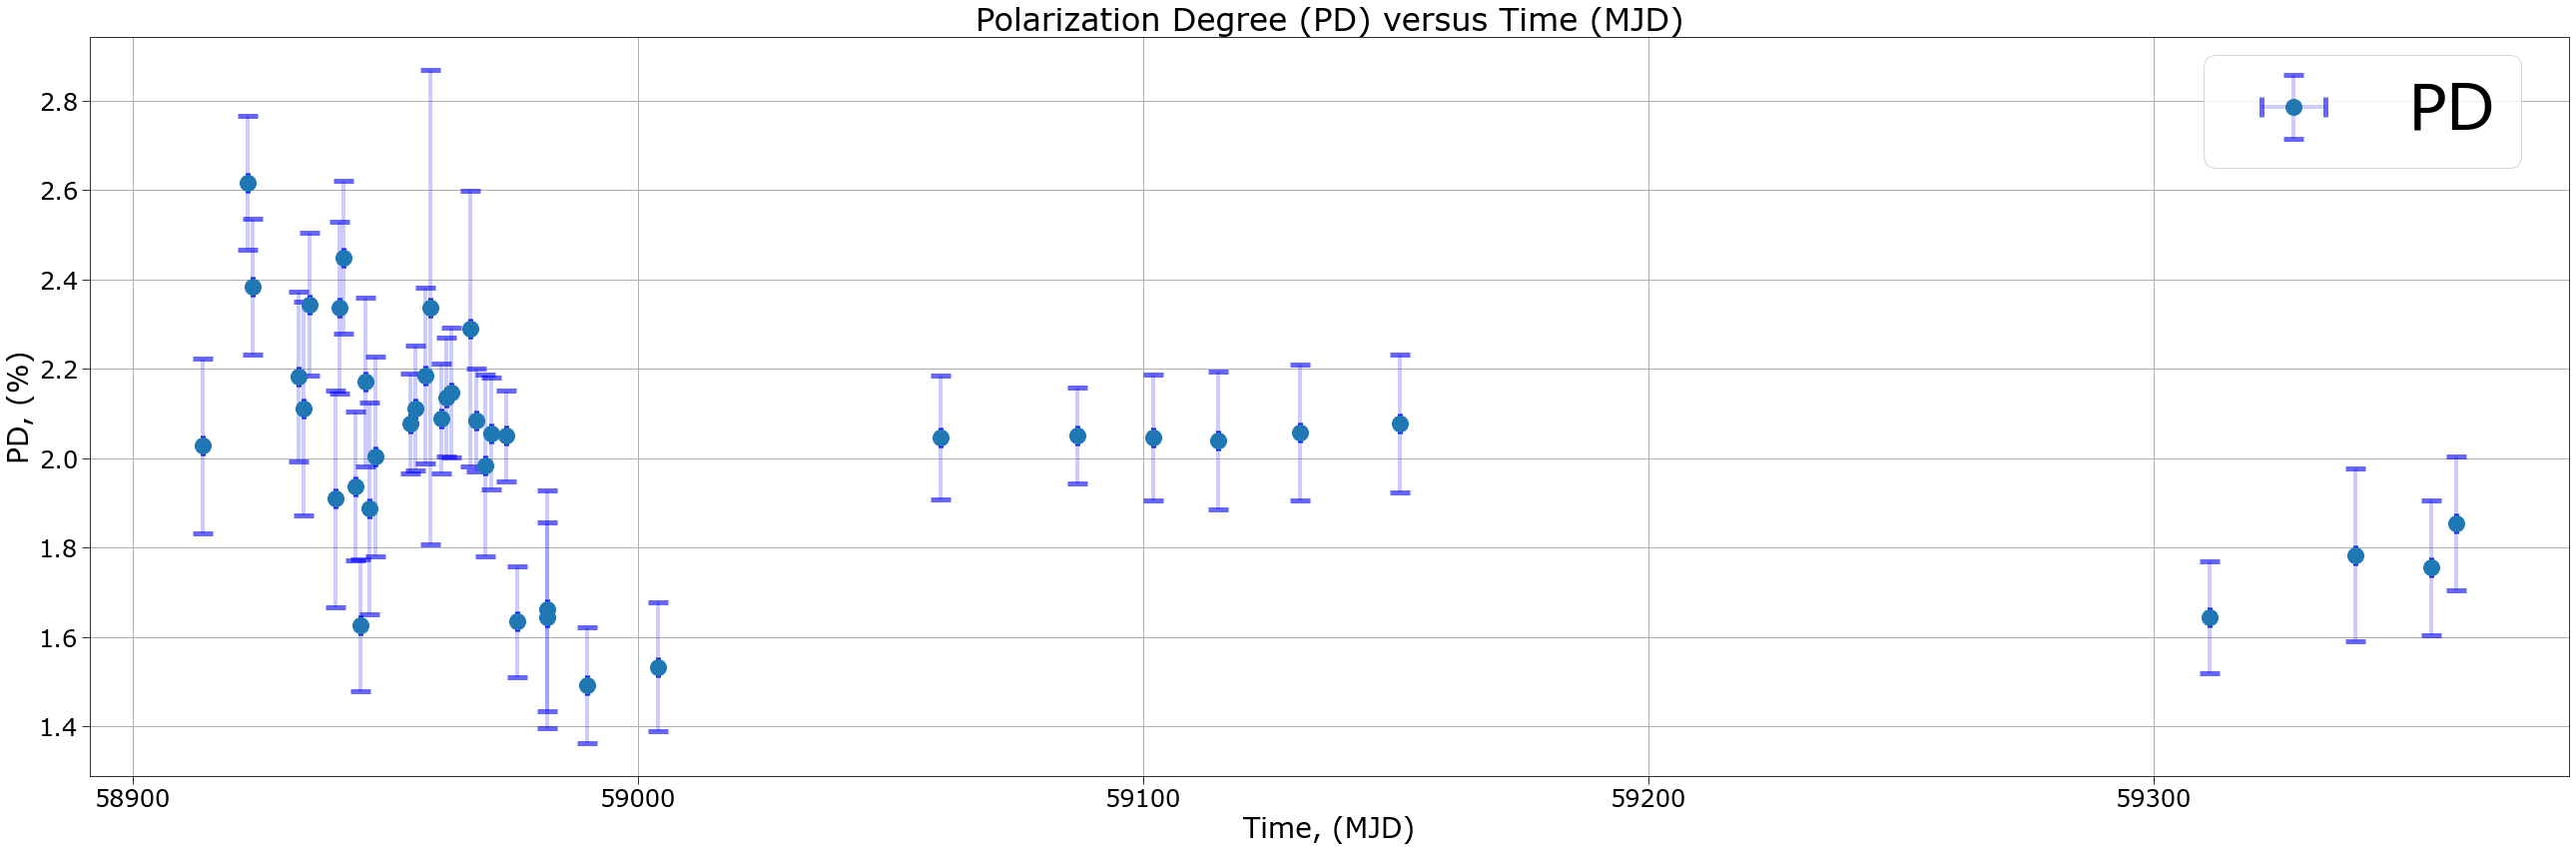

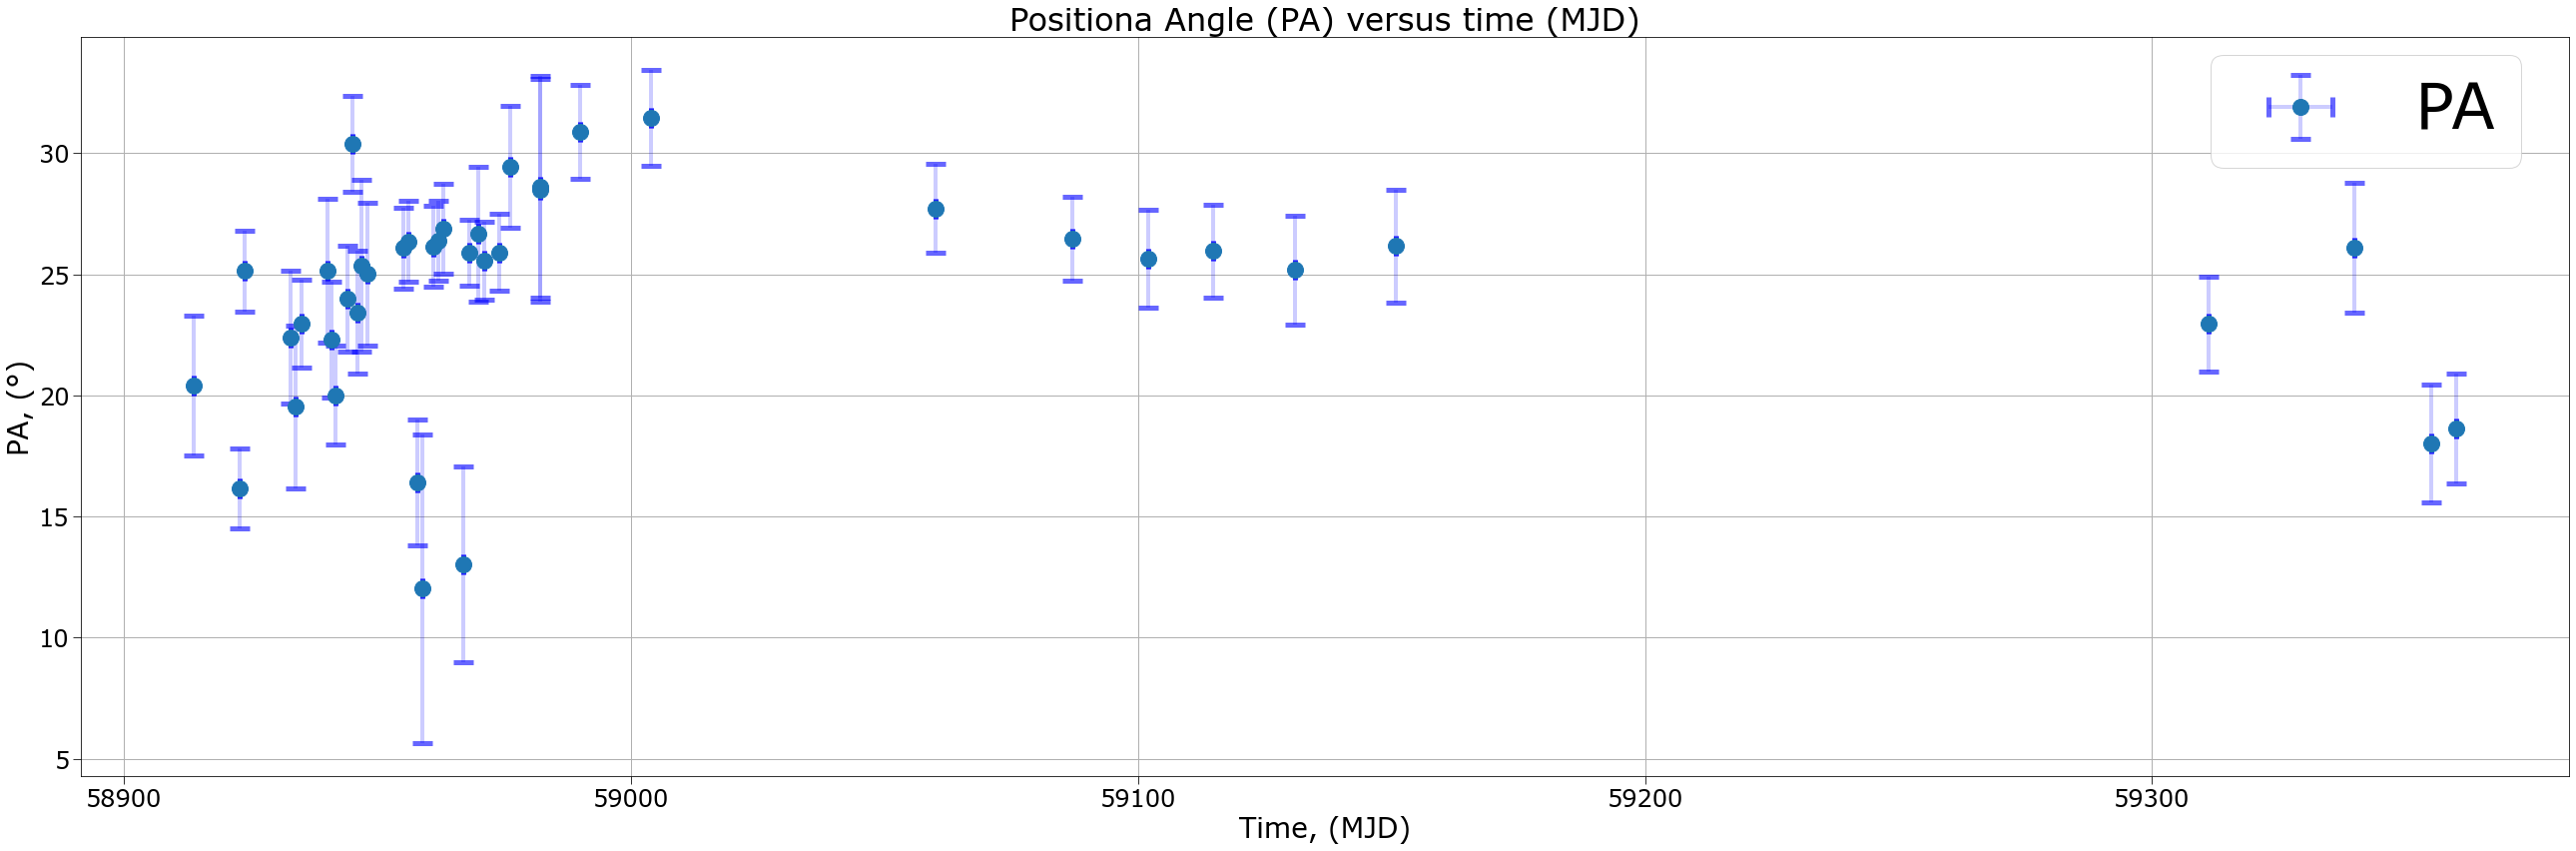

In [5]:
funcs_polarimetry.plot_pol_stab(EECep_PD_MJD_track, EECep_pd, EECep_pd_err, False,'PD')
funcs_polarimetry.plot_pol_stab(EECep_PA_MJD_track, EECep_pa, EECep_pa_err, False,'PA')

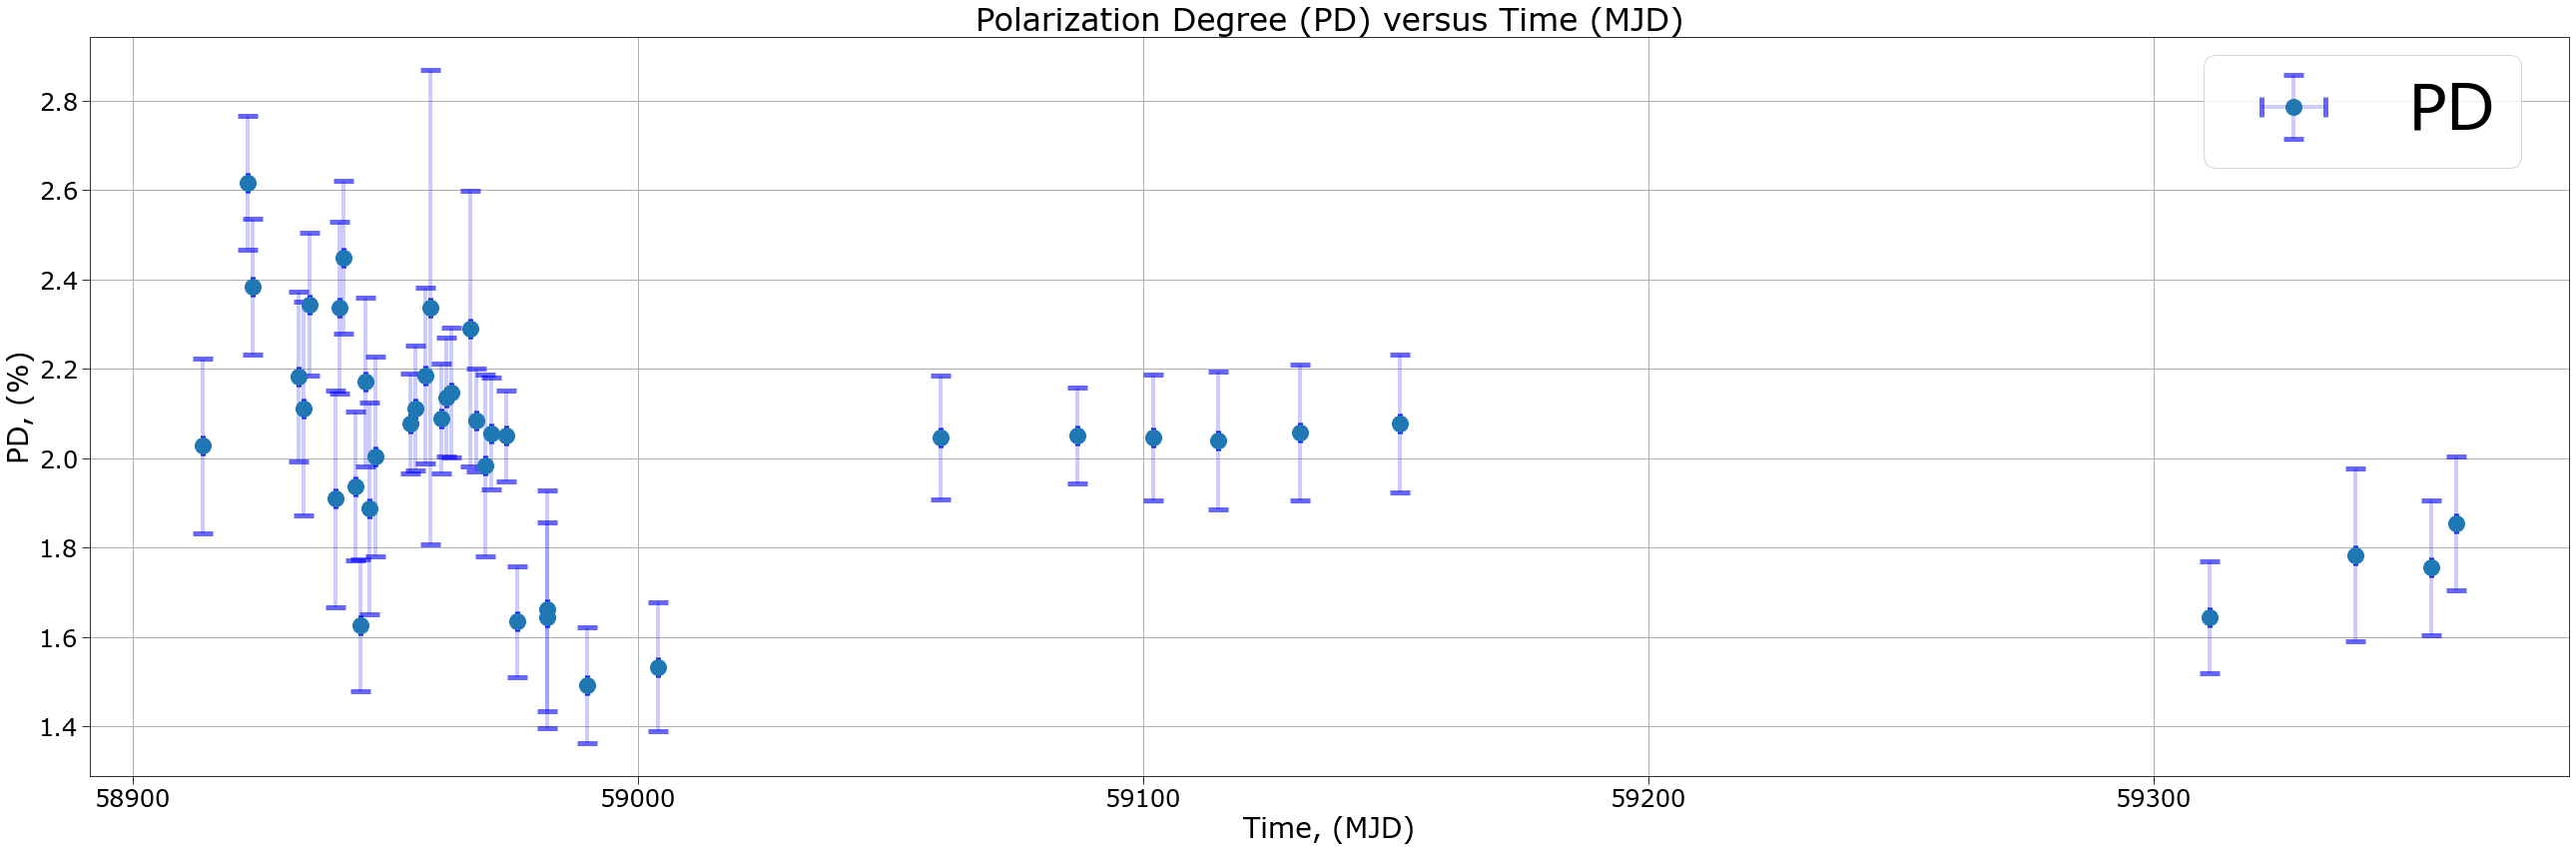

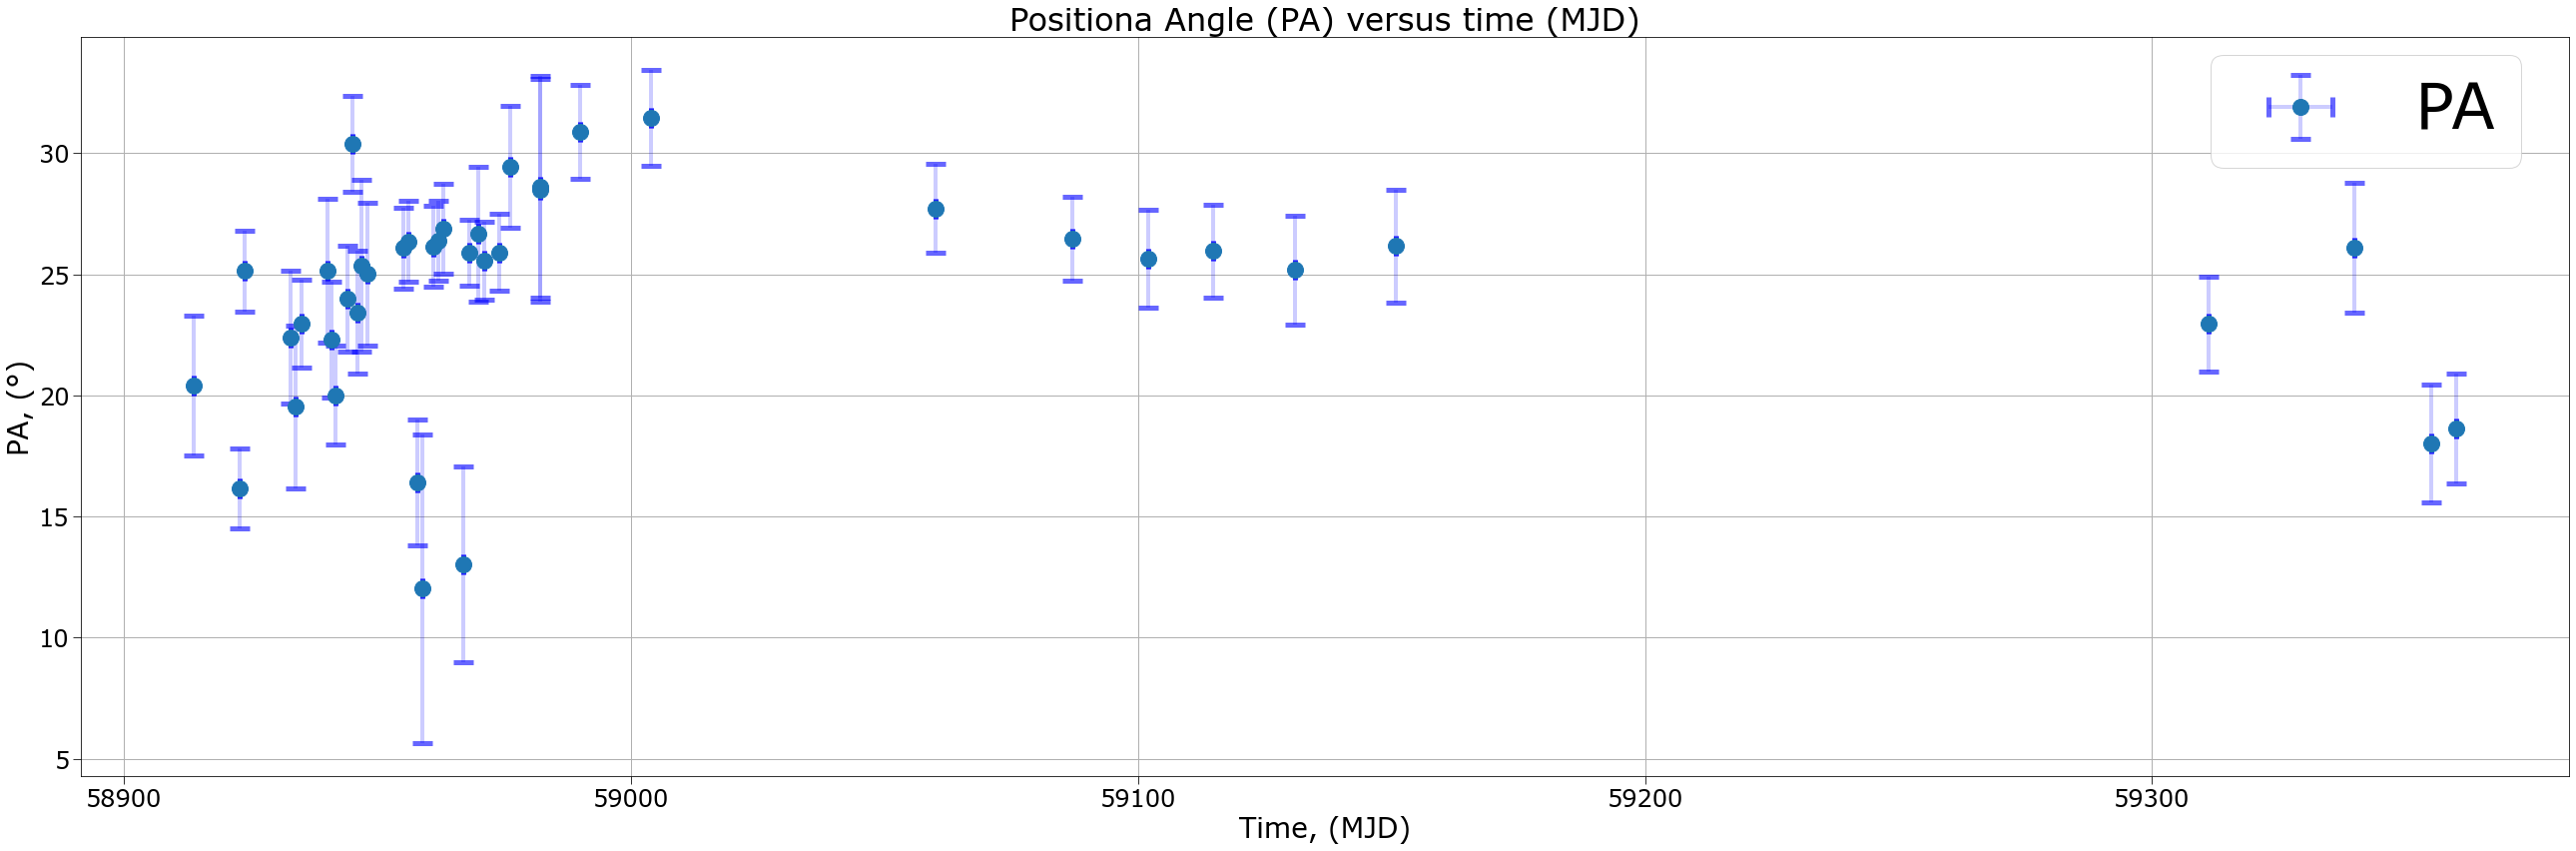

In [6]:
funcs_polarimetry.plot_pol_stab(EECep_PD_MJD_track, EECep_pd, EECep_pd_err, False,'PD')
funcs_polarimetry.plot_pol_stab(EECep_PA_MJD_track, EECep_pa, EECep_pa_err, False,'PA')

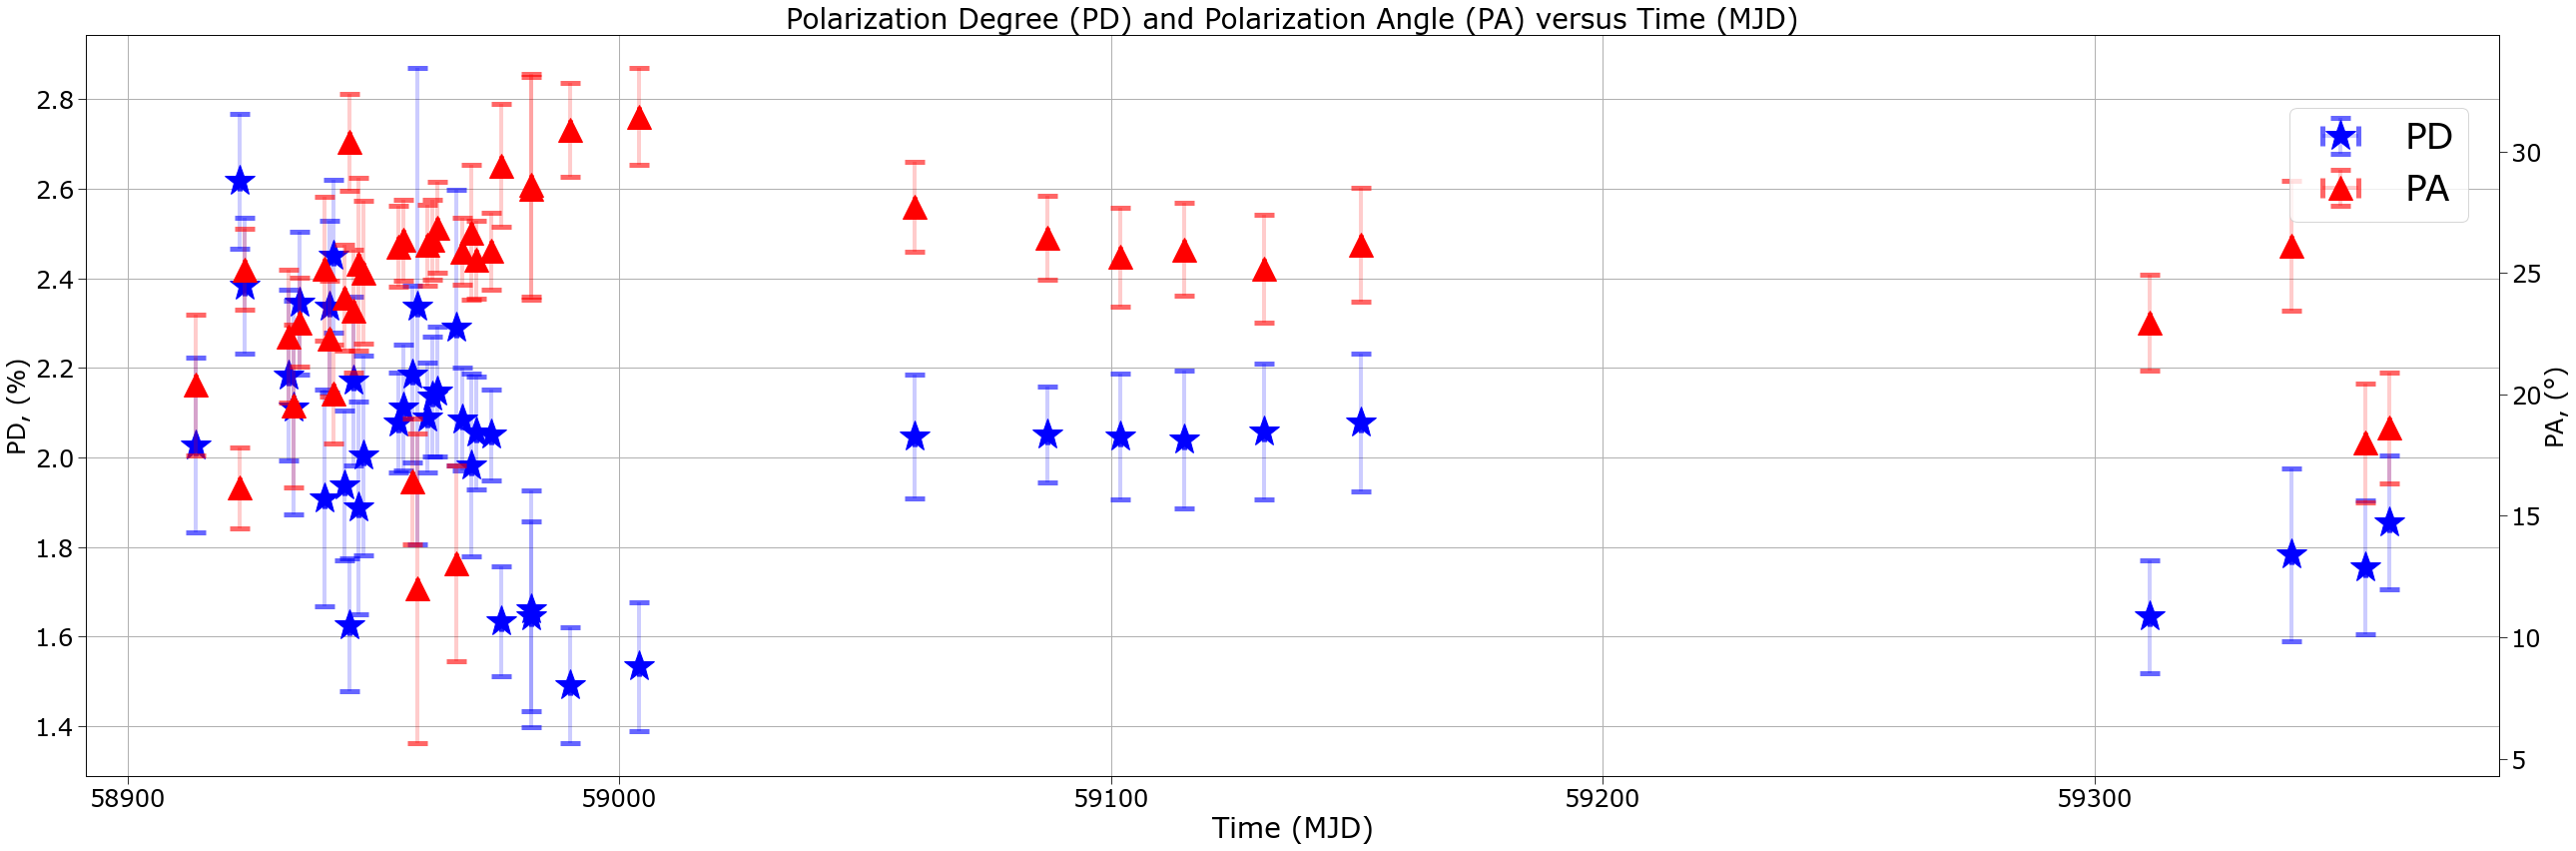

In [7]:
#funcs_polarimetry.plot_pol_stab(EECep_PD_MJD_track, EECep_pd, EECep_pd_err, True,'PD')
#funcs_polarimetry.plot_pol_stab(EECep_PA_MJD_track, EECep_pa, EECep_pa_err, True,'PA')

#From a total of 40 points
#I learned that the eclipse is 30 points. Steady state (off eclipse) is 6 points. 0.2 phase is 4 points

#PD goes down over time. #PA goes up over time

#This is sus. Why is it sus? This is is still sus.
#I have discovered the problem. It is inverted.
#PD waas in a 4G inverted dive with a PA?
#He was inverted.

#funcs_polarimetry.plot_pol_stab_doobly(EECep_PD_MJD_track, EECep_PA_MJD_track, EECep_pd, EECep_pa, EECep_pd_err, EECep_pa_err, '*', 'o', True)

funcs_polarimetry.plot_pol_stab_doobly(EECep_PD_MJD_track, EECep_PA_MJD_track, EECep_pd, EECep_pa, EECep_pd_err, EECep_pa_err, '*', '^', True)

In [8]:
#Just do a triple plot with the light curve

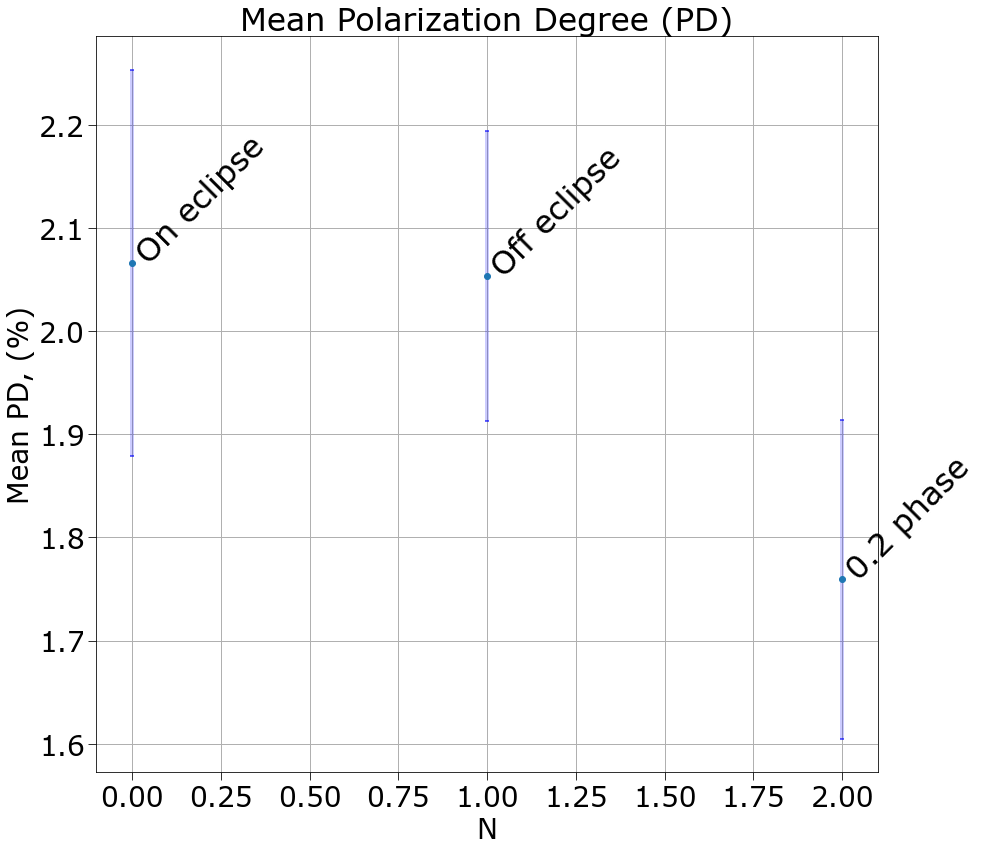

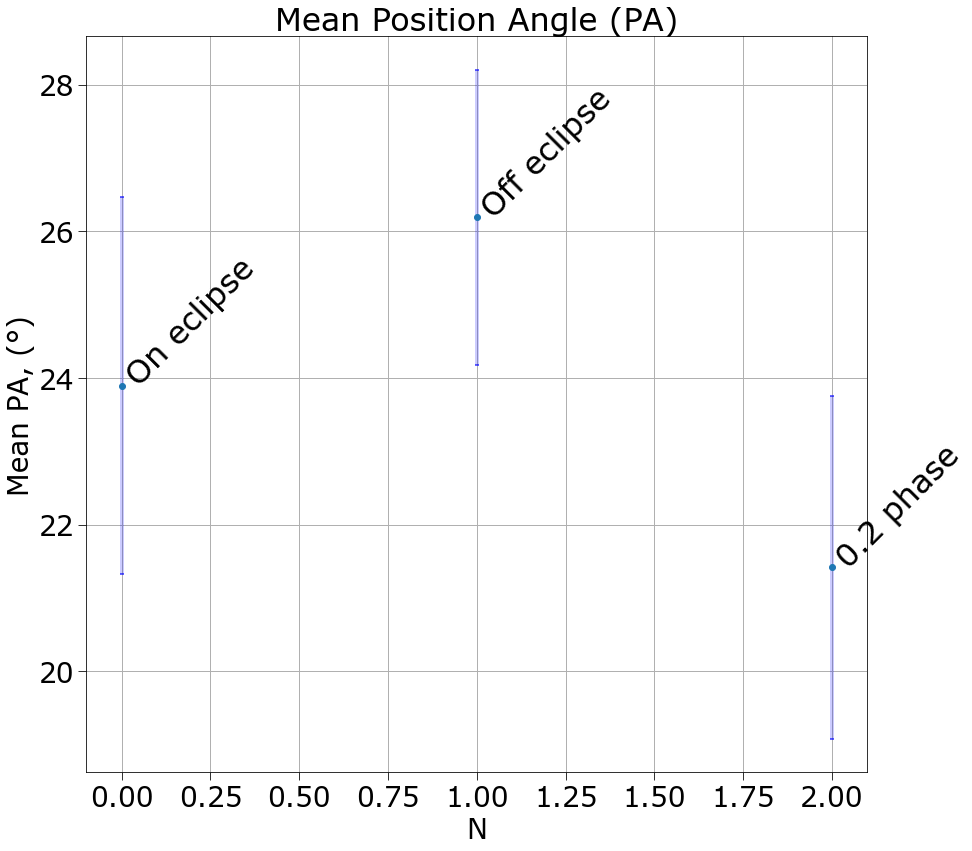

In [9]:
single_plot_mean_pol_d( EECep_pd, EECep_pd_err, "PD")
single_plot_mean_pol_d( EECep_pa, EECep_pa_err, "PA")

In [10]:
print("The on eclipse region is:", EECep_PD_MJD_track[0].value, "to", EECep_PD_MJD_track[30].value) #This does not change round to round

print("Some things about the PD time series:")
print("Mean of all measured pd is:", np.mean(EECep_pd), u"\u00B1", np.mean(EECep_pd_err))
print("Mean pd during the eclipse is:", np.mean(EECep_pd[:30]), u"\u00B1", np.mean(EECep_pd_err[:30]))
print("Mean pd off the eclipse is:", np.mean(EECep_pd[31:37]), u"\u00B1", np.mean(EECep_pd_err[31:37]))
print("Mean pd at 0.2 phase is:", np.mean(EECep_pd[37:]), u"\u00B1", np.mean(EECep_pd_err[37:]))
print("Standard deviation of all measured PD is:",np.std(EECep_pd))

print("\n******************************************************************************************\n")

print("Some basic things about the PA time series:")
print("Mean of all measured pa is:",np.mean(EECep_pa), u"\u00B1", np.mean(EECep_pa_err))
print("Mean pa during the eclipse is:", np.mean(EECep_pa[:30]), u"\u00B1", np.mean(EECep_pa_err[:30]))
print("Mean pa off the eclipse is:", np.mean(EECep_pa[31:37]), u"\u00B1", np.mean(EECep_pa_err[31:37]))
print("Mean pa at 0.2 phase is:", np.mean(EECep_pa[37:]), u"\u00B1", np.mean(EECep_pa_err[37:]))
print("Standard deviation PA is:",np.std(EECep_pa))

The on eclipse region is: 58913.81344675926 to 59003.93817476852
Some things about the PD time series:
Mean of all measured pd is: 2.021147682374062 ± 0.17631164792836426
Mean pd during the eclipse is: 2.0658249965548707 ± 0.1873486417283158
Mean pd off the eclipse is: 2.0534969728705437 ± 0.14092689013279125
Mean pd at 0.2 phase is: 1.759458768756899 ± 0.15466308393311198
Standard deviation of all measured PD is: 0.2526841683866546

******************************************************************************************

Some basic things about the PA time series:
Mean of all measured pa is: 24.17528863829073 ± 2.452307756173807
Mean pa during the eclipse is: 23.89791073573134 ± 2.5714990063322207
Mean pa off the eclipse is: 26.18837435343023 ± 2.011813435710604
Mean pa at 0.2 phase is: 21.419155396517198 ± 2.3382099262102995
Standard deviation PA is: 4.431114038387312


In [11]:
#tm_pd
#tm_pd[25:30]

In [12]:
print("2020 MJDs:", EECep_PD_MJD_track)
#The necessary transform for the light curve
tm_pd = Time(EECep_PD_MJD_track, scale='utc',format='mjd')
tm_pa = Time(EECep_PA_MJD_track, scale='utc',format='mjd')

2020 MJDs: [58913.81344676 58922.78325648 58923.75659711 58932.83197853
 58933.78986418 58935.02764398 58940.06977002 58940.96967708
 58941.78031661 58944.09940874 58945.09941065 58945.97238125
 58946.88202714 58947.96324115 58955.02866227 58956.00805648
 58957.90564606 58958.87942986 58960.99852037 58962.03068837
 58963.01625312 58966.84672622 58967.9974537  58969.86124531
 58970.98581499 58973.95327037 58976.06242124 58982.05153762
 58982.05163507 58989.99448142 59003.93817477 59059.98128206
 59087.01971308 59101.96008484 59114.81984936 59131.03620324
 59150.76178953 59311.09911782 59340.00948796 59354.9925
 59360.0113739 ]


Reading: ee_cep_2014.txt


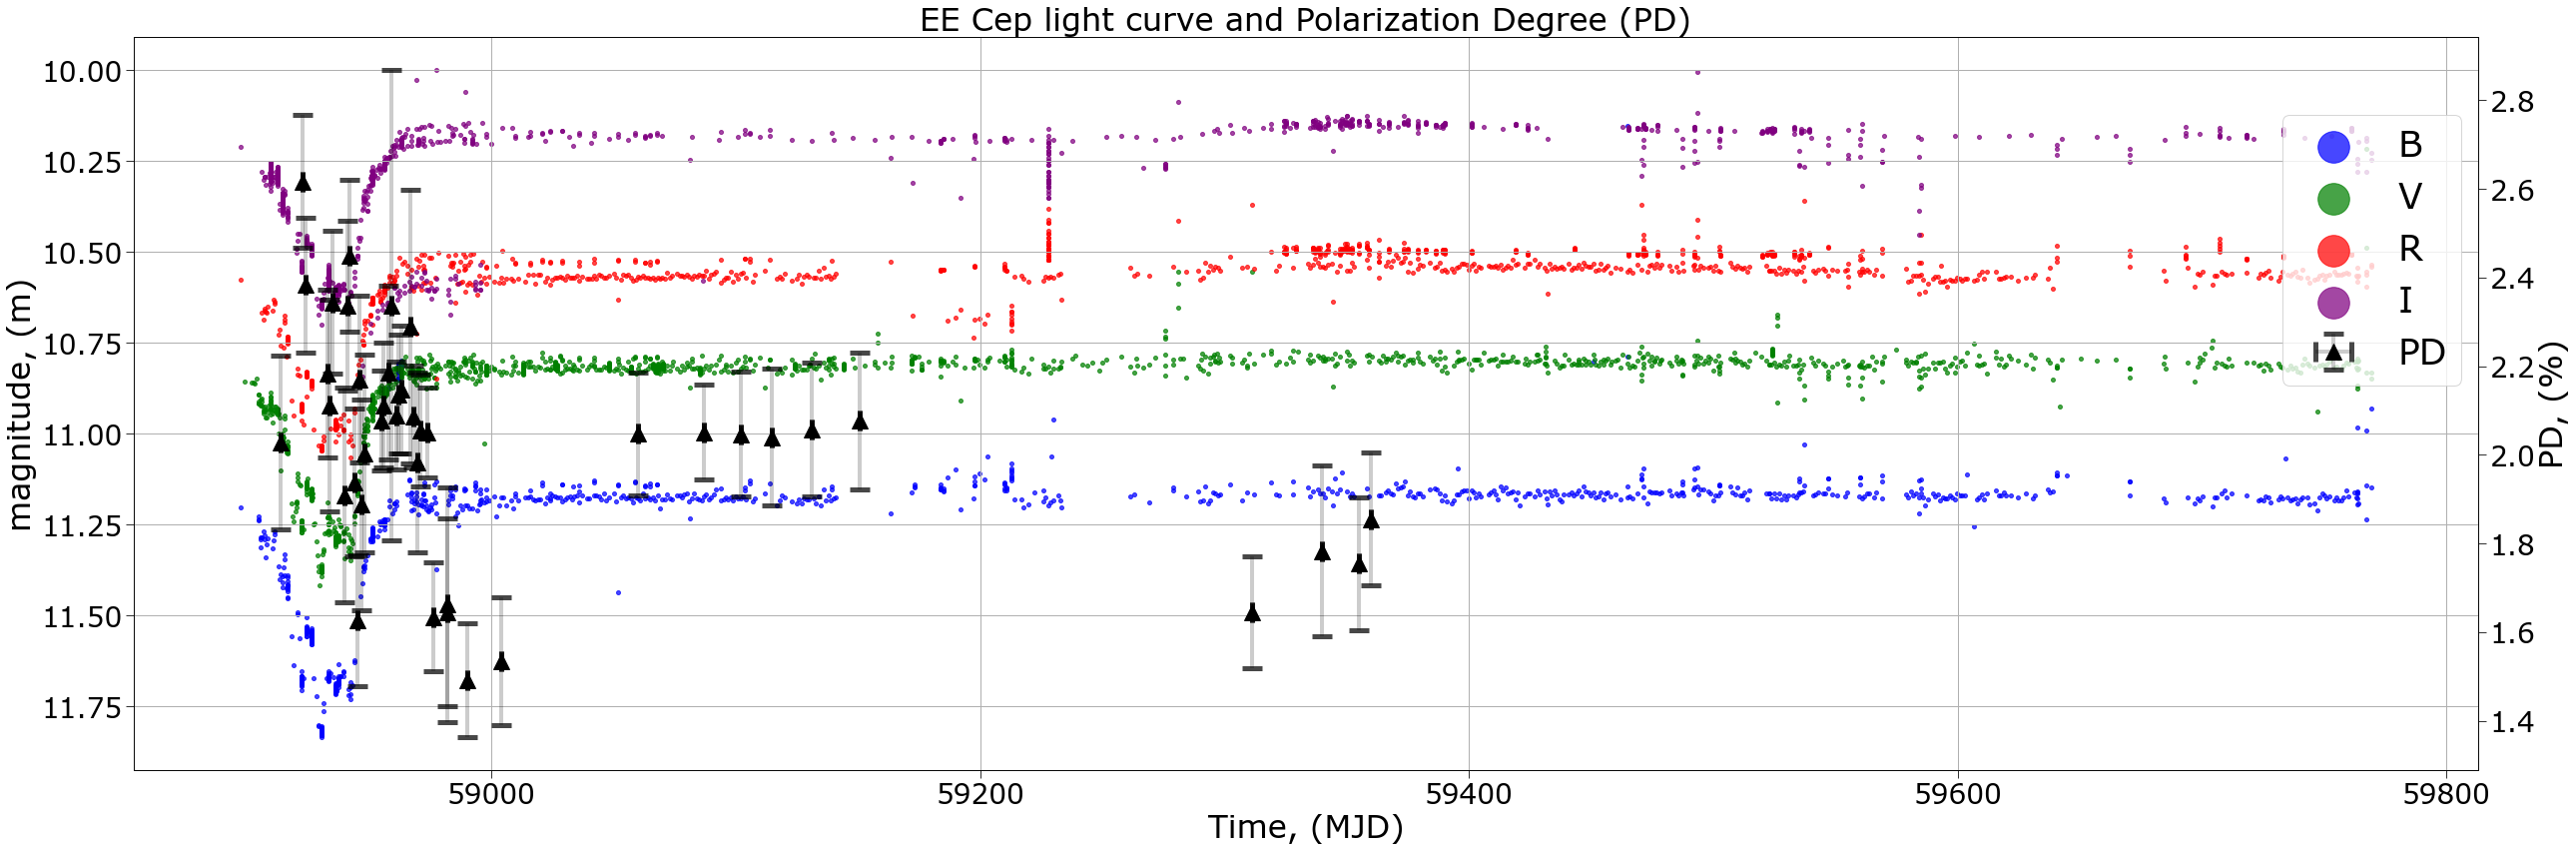

In [13]:
funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 58900 , 59900, False ,True, False, '^' ,'PD', False,'title')
#

Reading: ee_cep_2014.txt


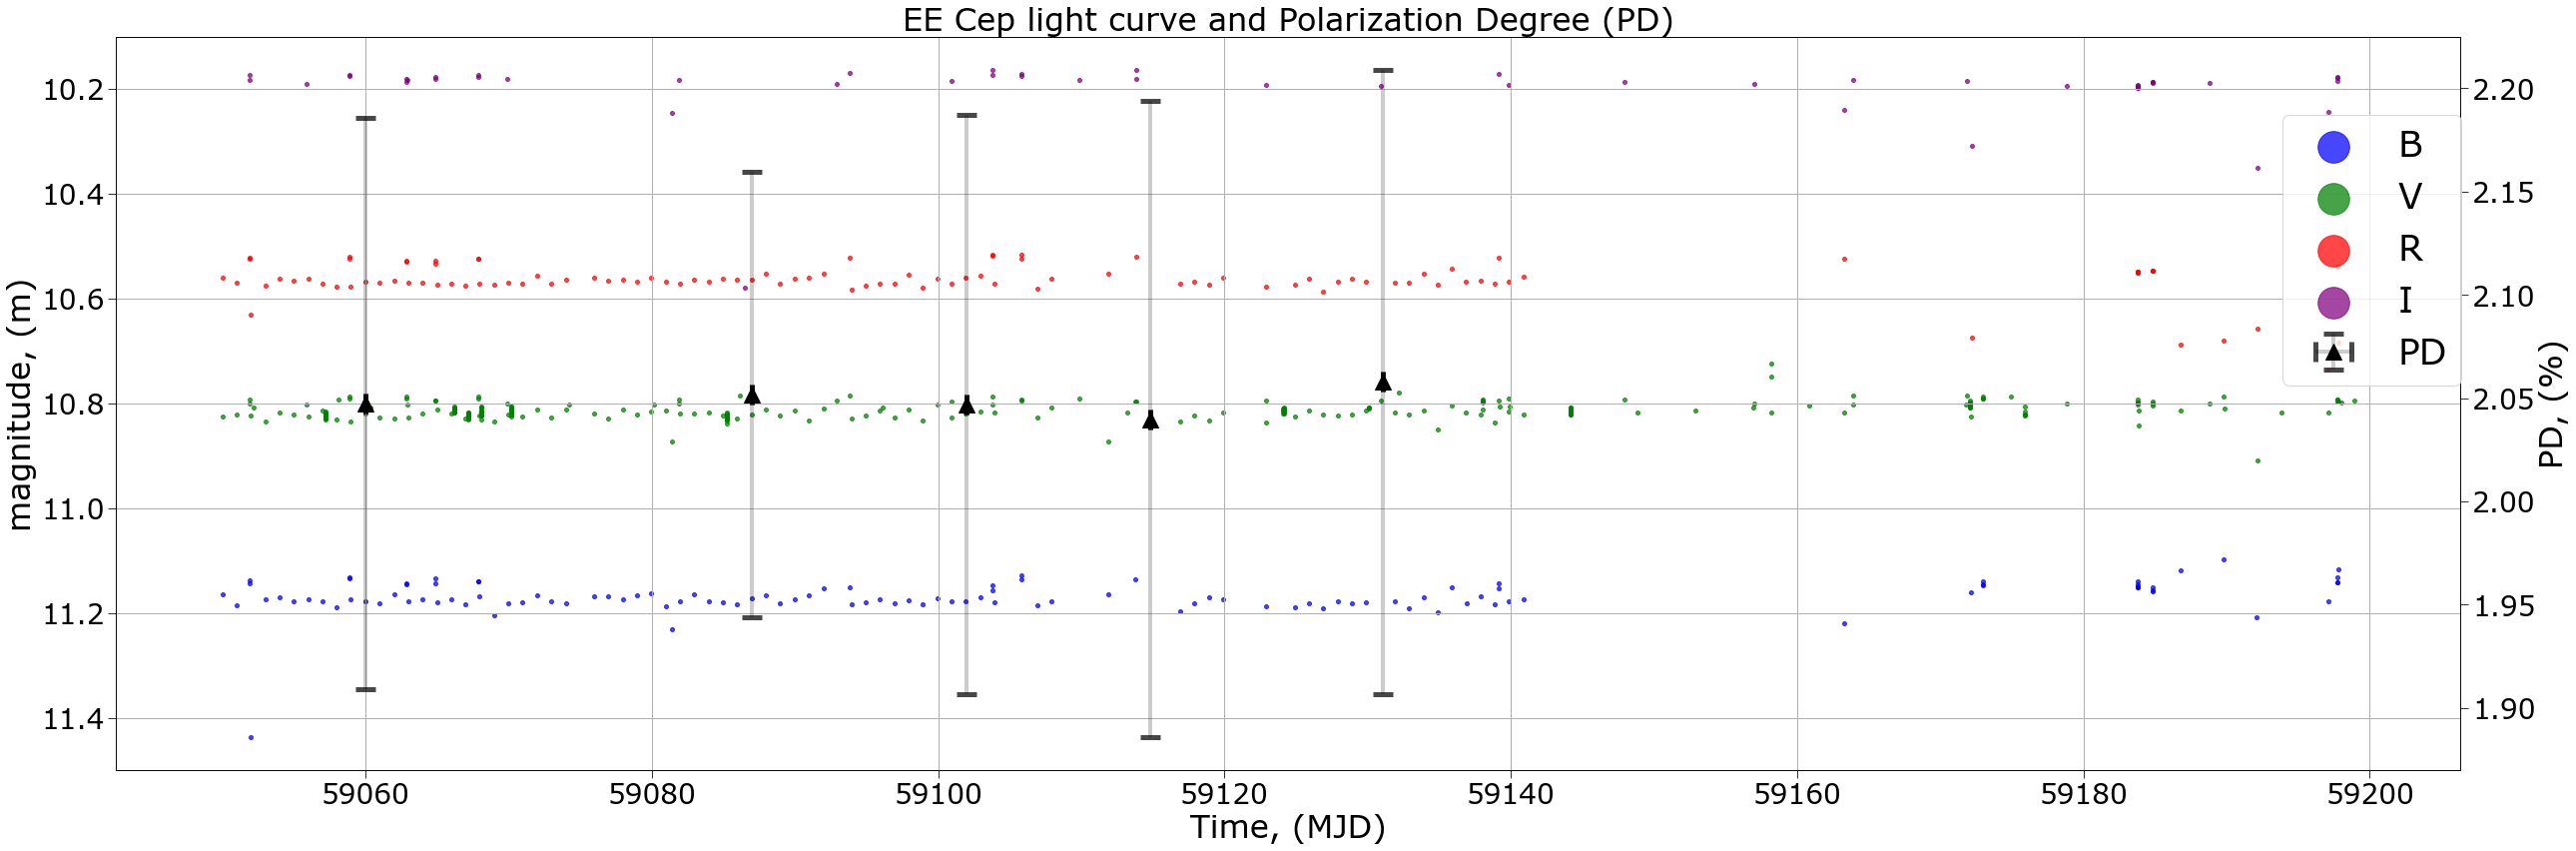

Reading: ee_cep_2014.txt


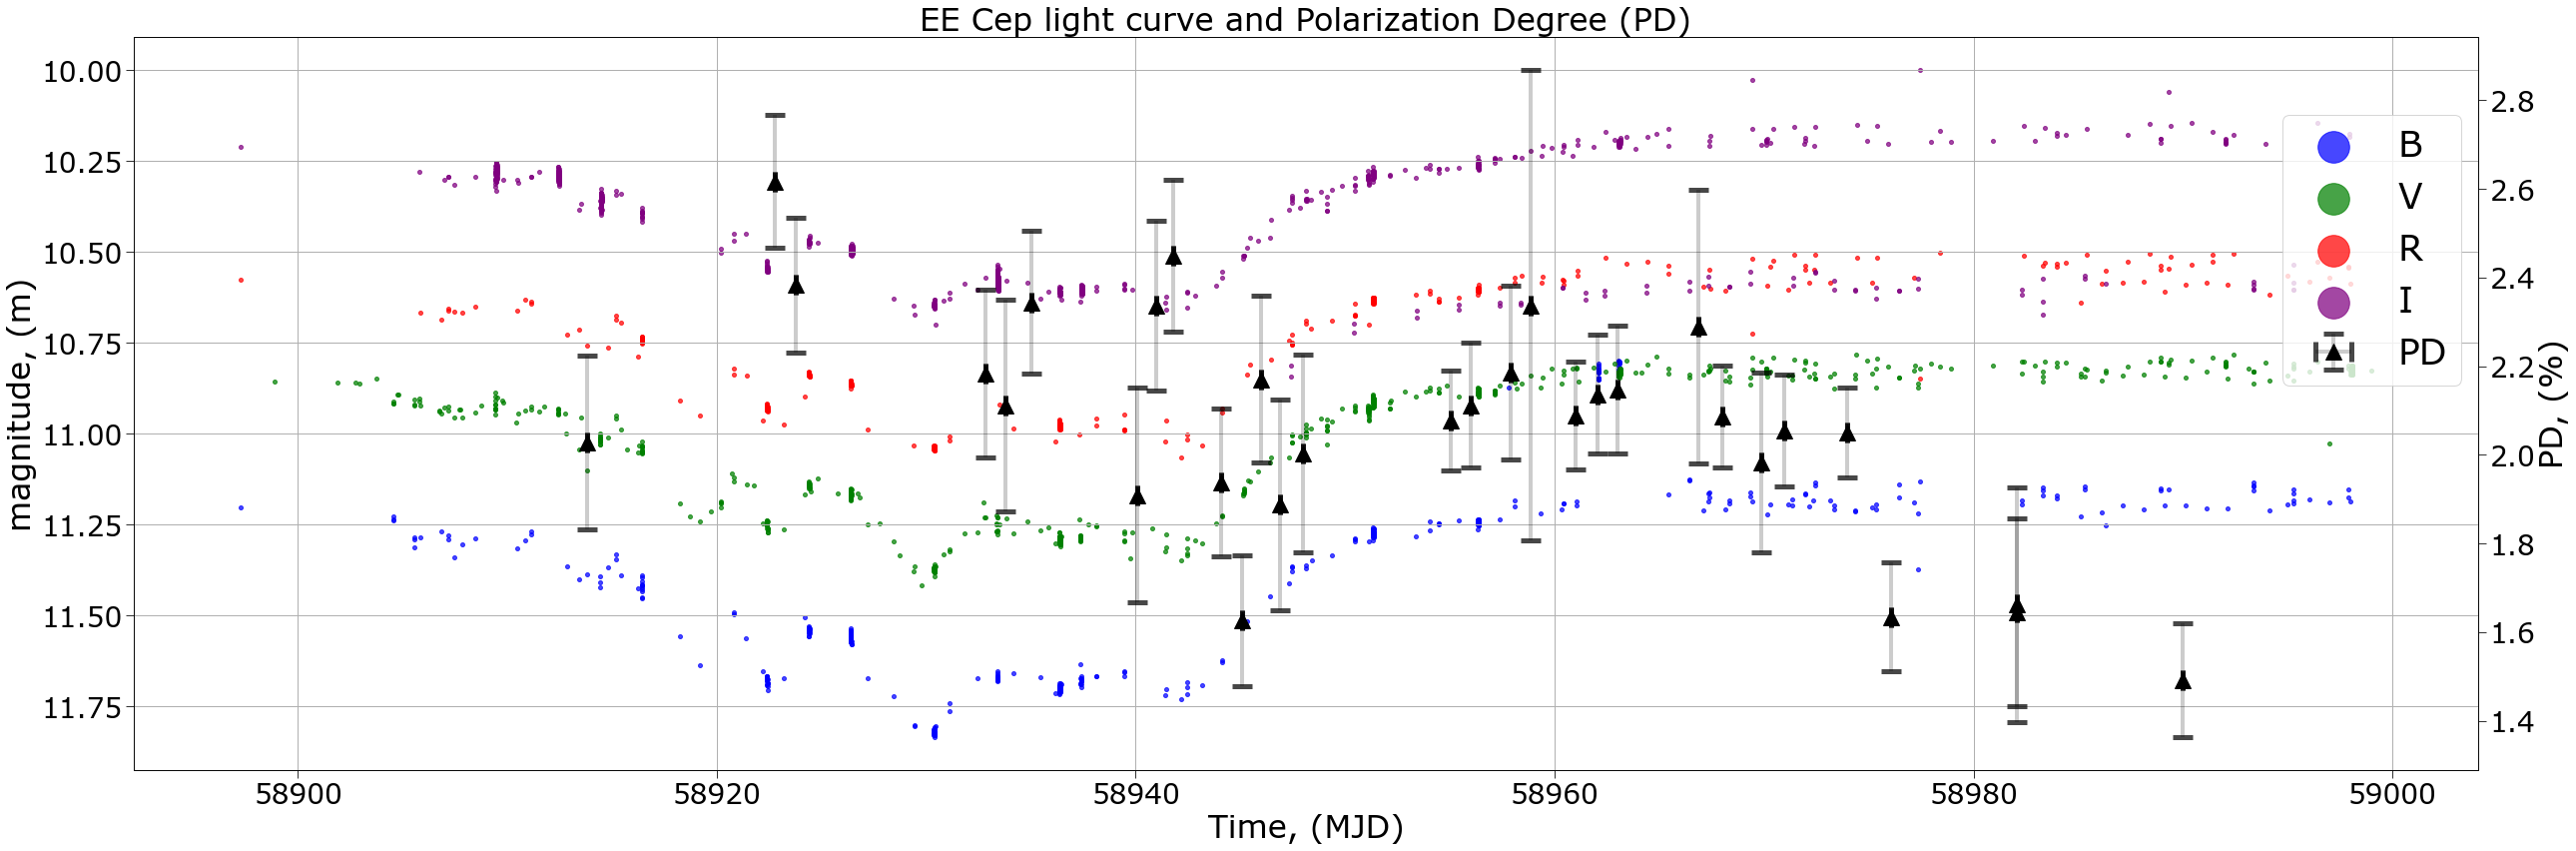

Reading: ee_cep_2014.txt


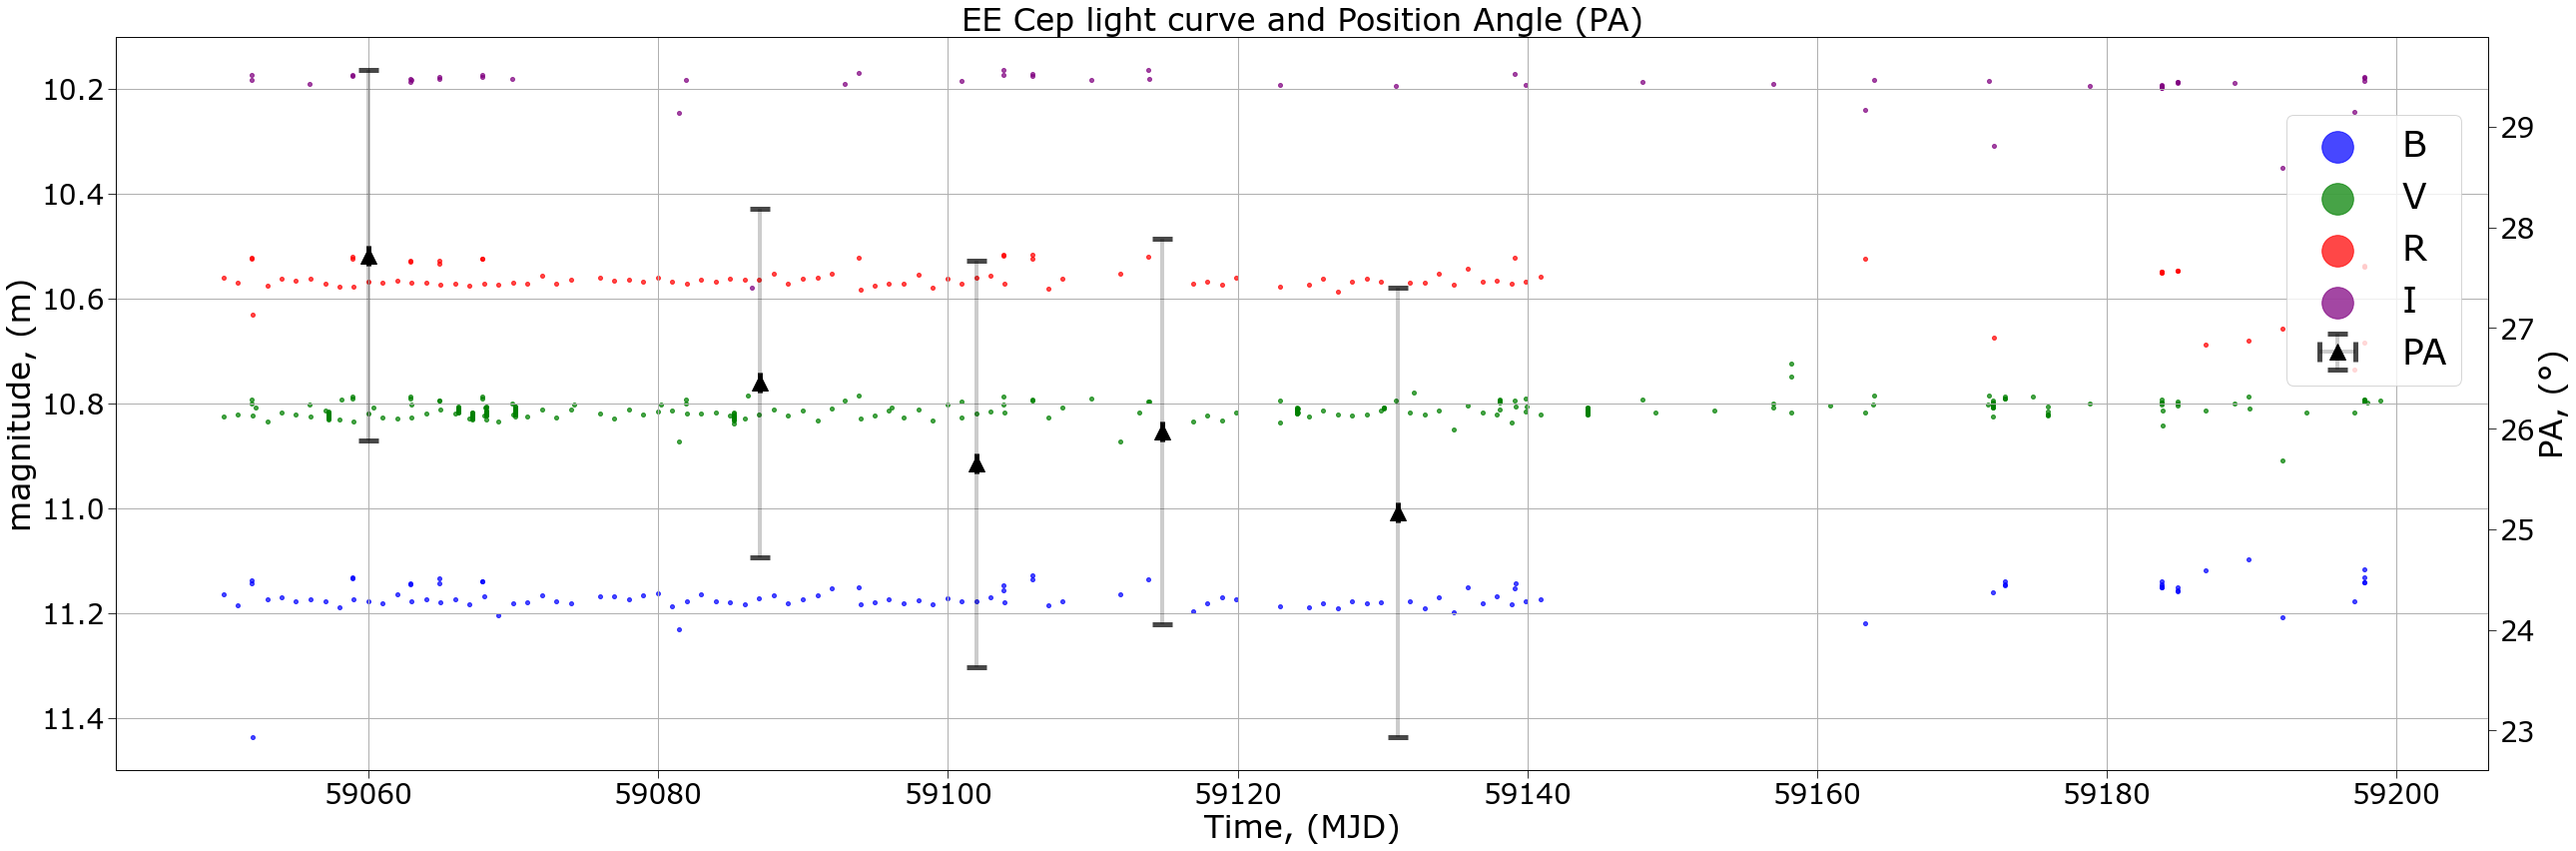

Reading: ee_cep_2014.txt


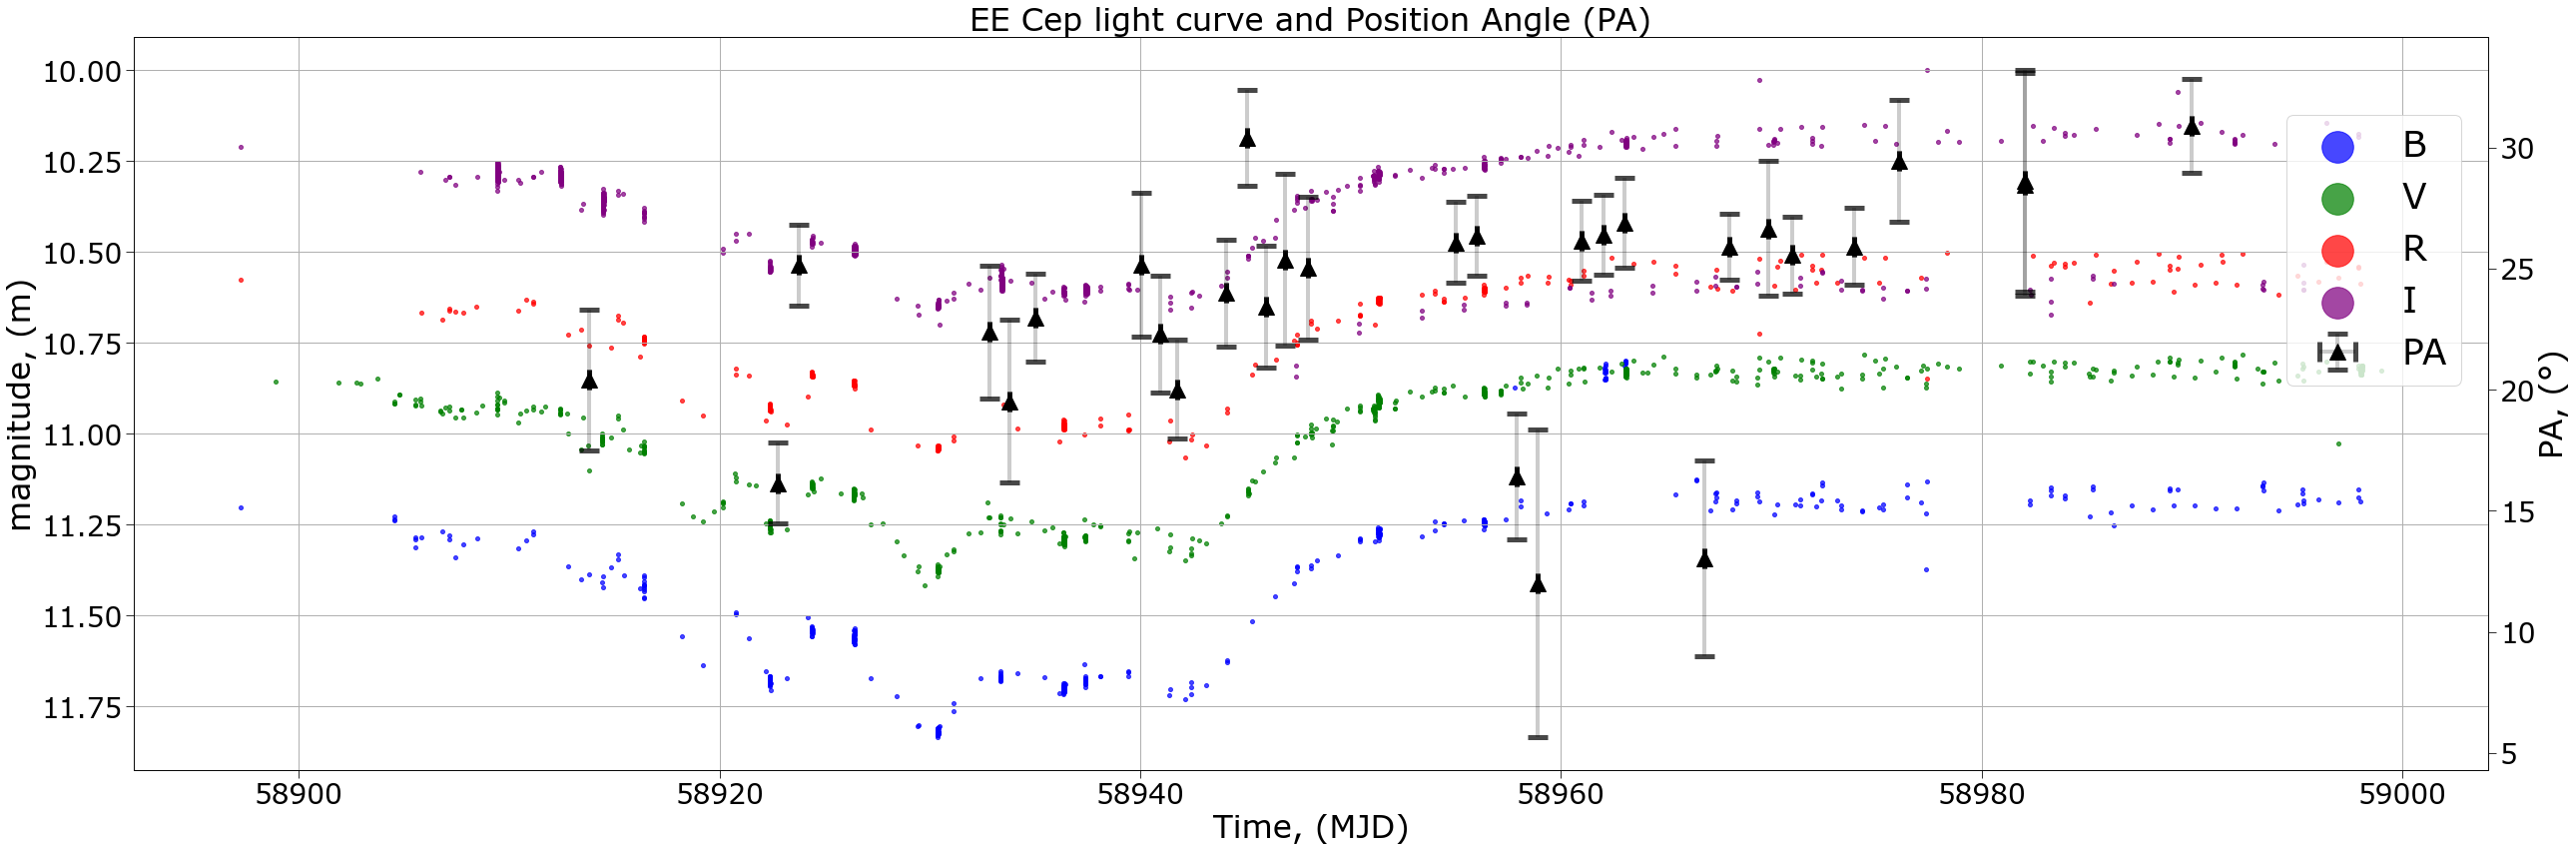

In [14]:
funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 59050 , 59200, False ,True, False, '^' ,'PD', False,'title')
funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 58900 , 59000, False ,True, False, '^','PD', False,'title')
funcs_polarimetry.EECep_light_curve_based((EECep_pa, EECep_pa_err,  tm_pa), 59050 , 59200, False ,True, False, '^','PA', False,'title')
funcs_polarimetry.EECep_light_curve_based((EECep_pa, EECep_pa_err,  tm_pa), 58900 , 59000, False ,True, False, '^','PA', False,'title')

#funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 59050 , 59200, False ,True, False, '^' ,'PD', False, 'tit;')
#funcs_polarimetry.EECep_light_curve_based((EECep_pa, EECep_pa_err,  tm_pa), 50000 , 59400, False ,True, False, '^','PA', False)

Reading: ee_cep_2014.txt


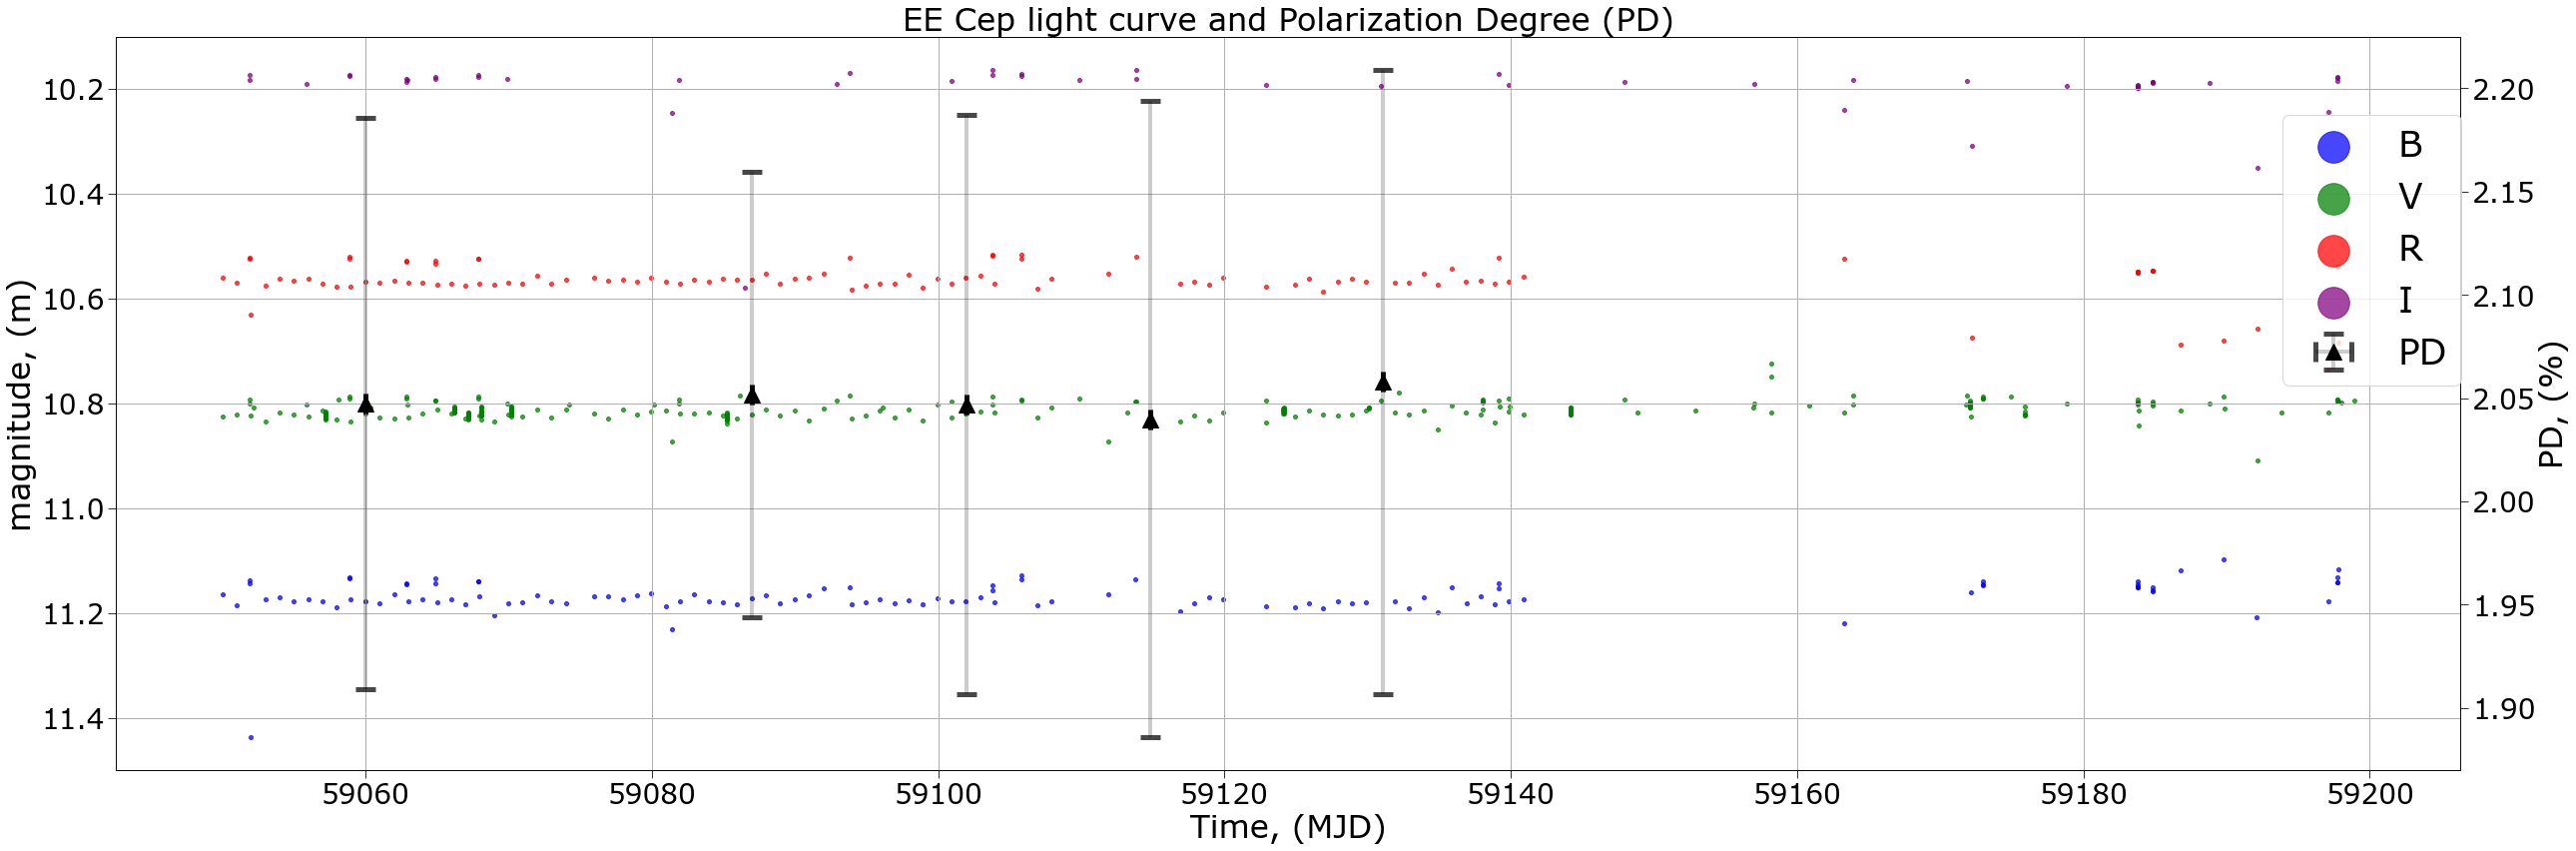

Reading: ee_cep_2014.txt


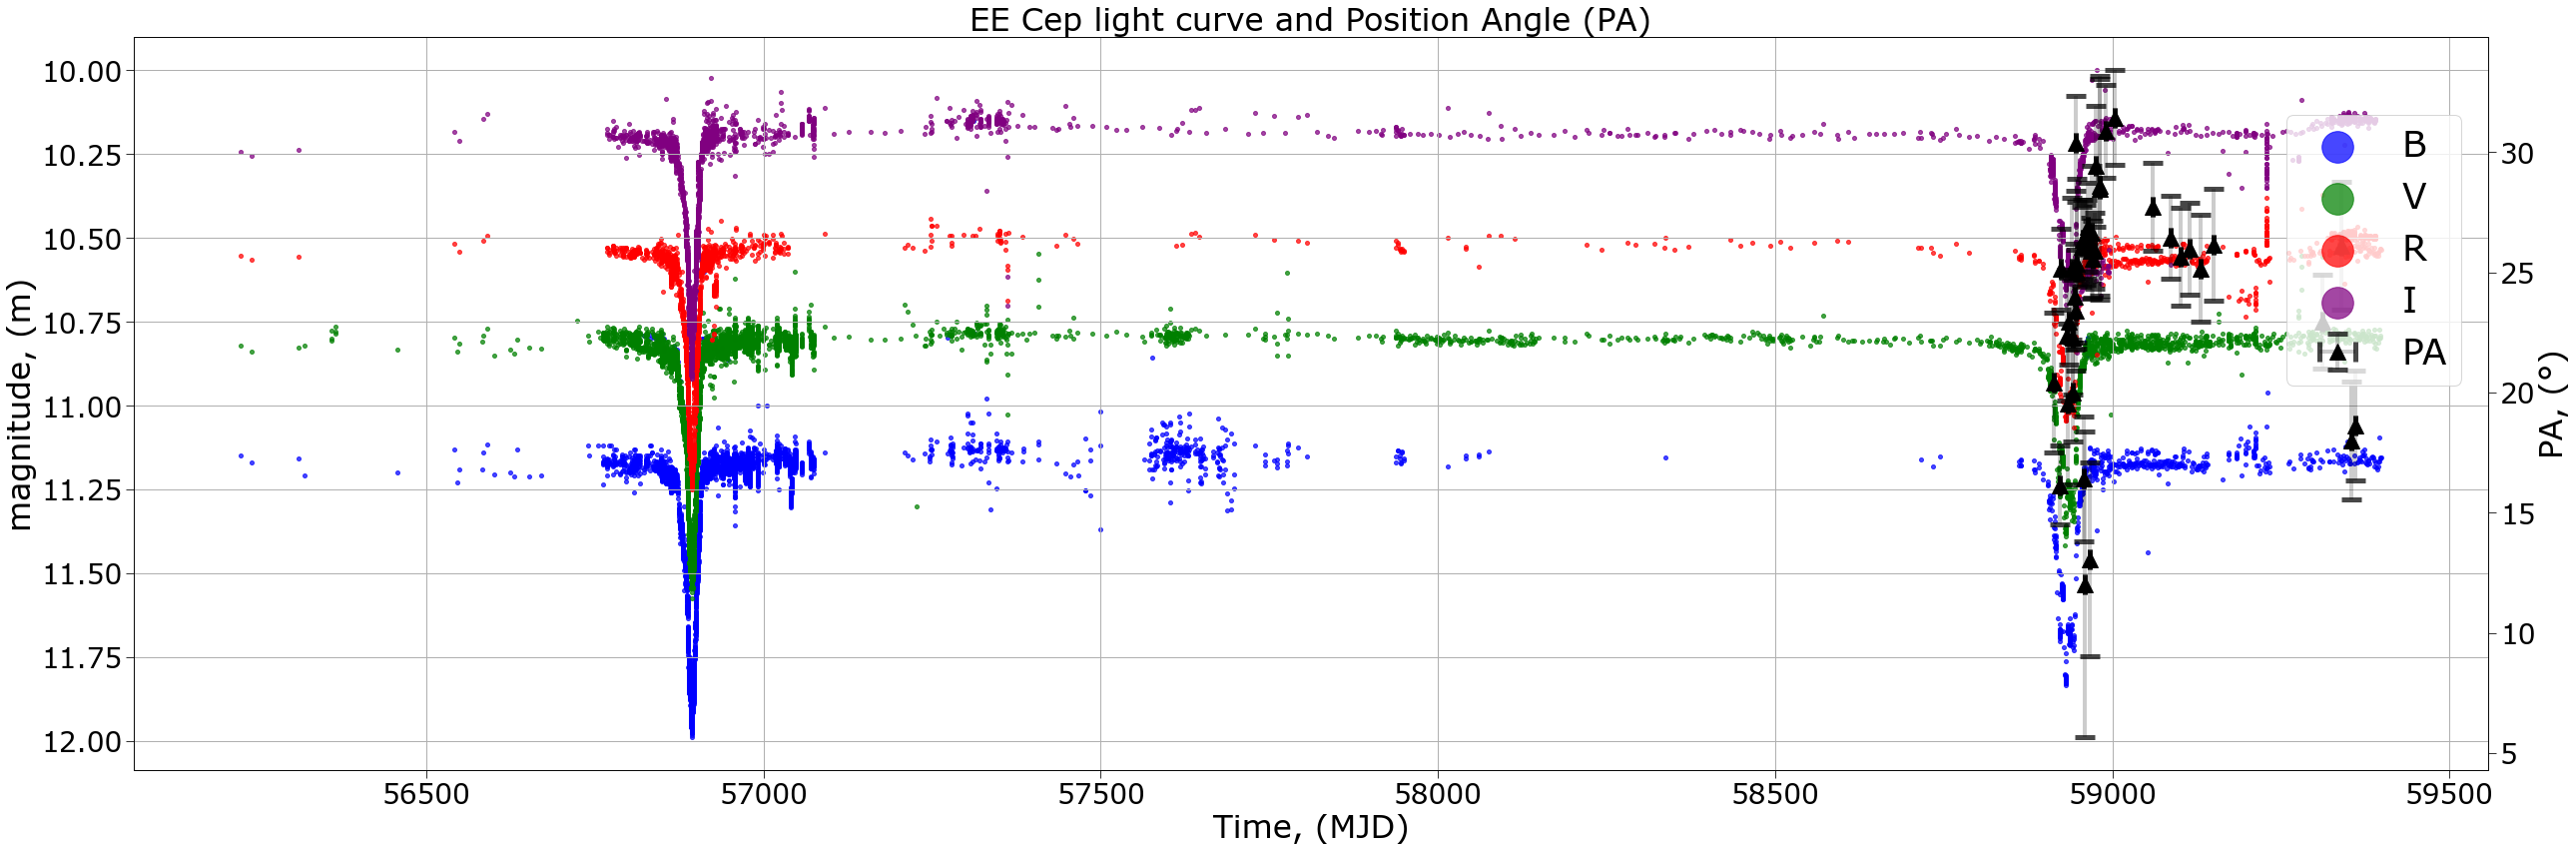

In [15]:
funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 59050 , 59200, False ,True, False, '^' ,'PD', False, 'title')
funcs_polarimetry.EECep_light_curve_based((EECep_pa, EECep_pa_err,  tm_pa), 50000 , 59400, False ,True, False, '^','PA', False, 'title')

Reading: ee_cep_2014.txt


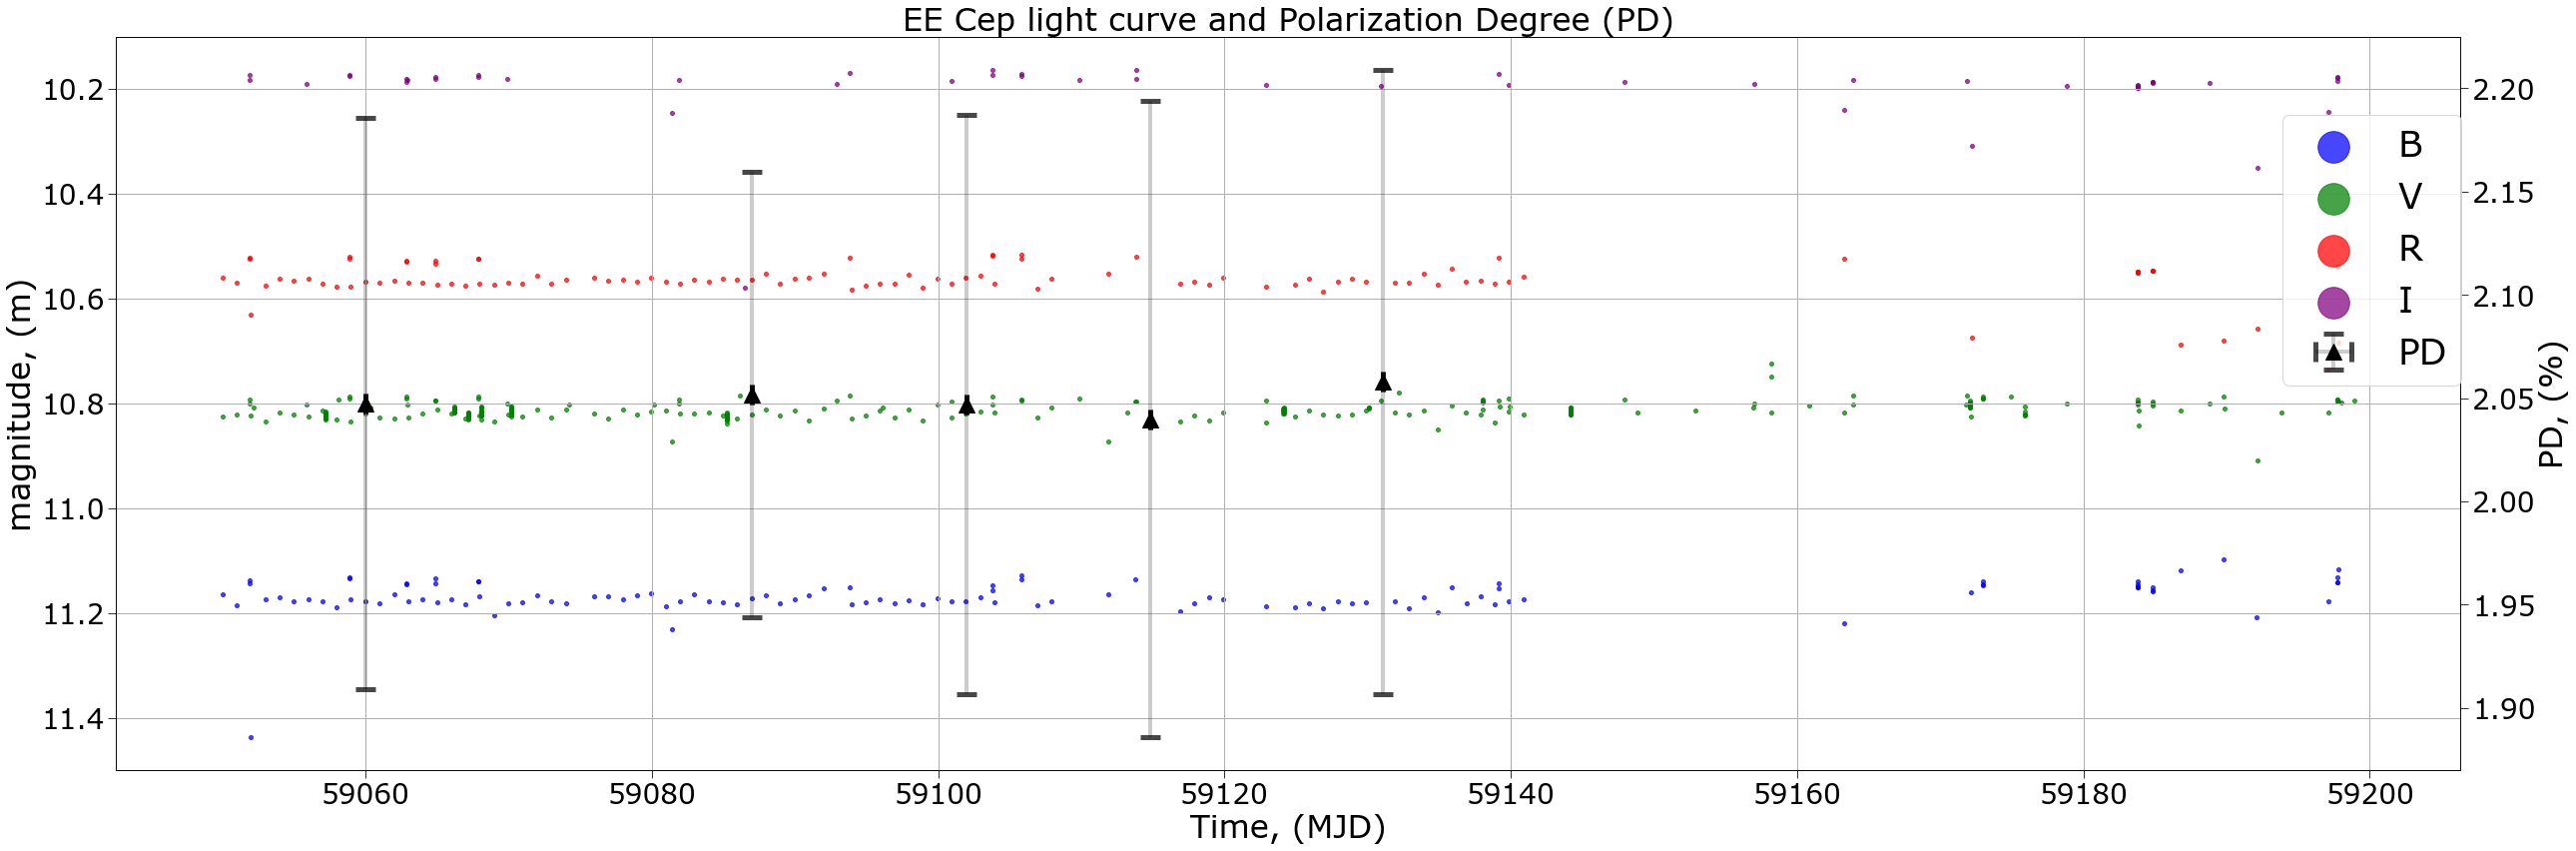

Reading: ee_cep_2014.txt


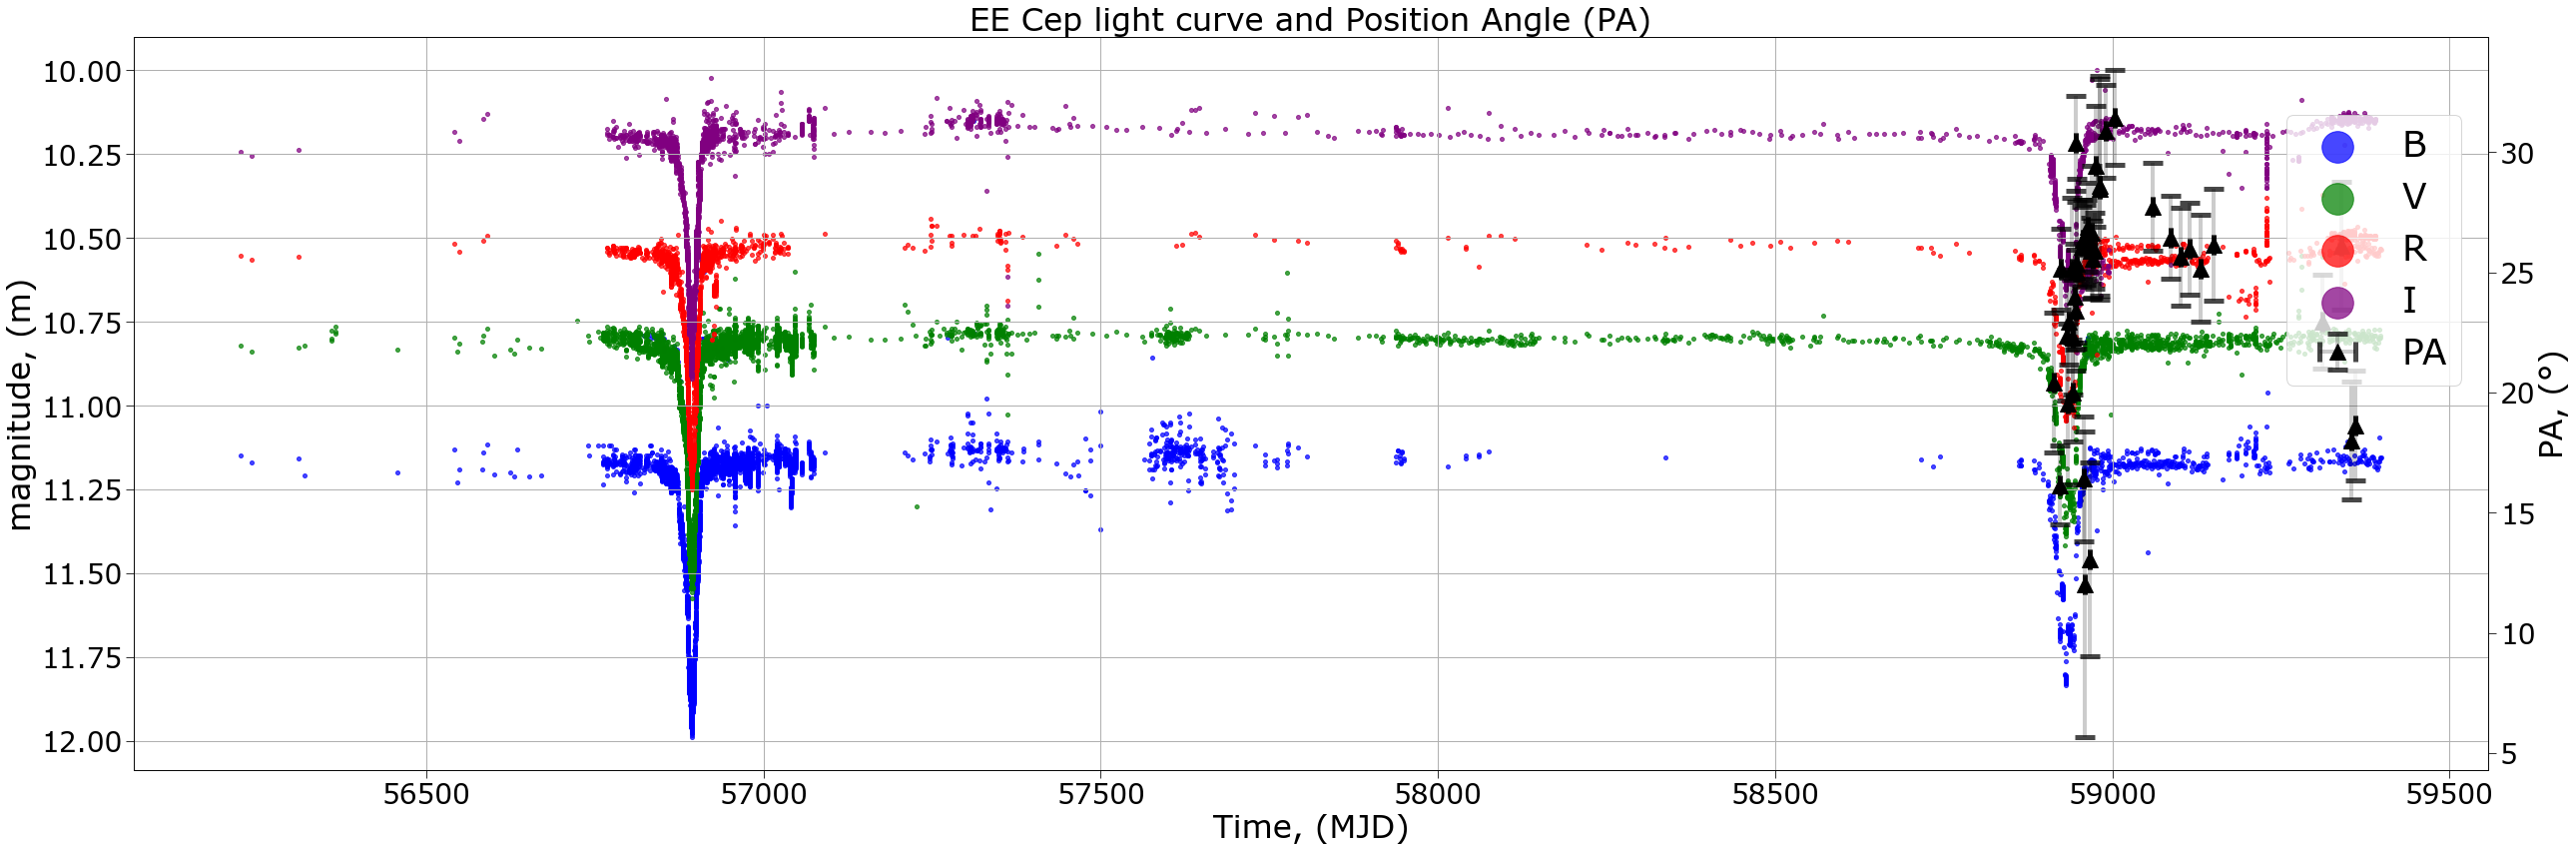

In [16]:
funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 59050 , 59200, False ,True, False, '^' ,'PD', False, 'title')
funcs_polarimetry.EECep_light_curve_based((EECep_pa, EECep_pa_err,  tm_pa), 50000 , 59400, False ,True, False, '^','PA', False, 'title')

Reading: ee_cep_2014.txt


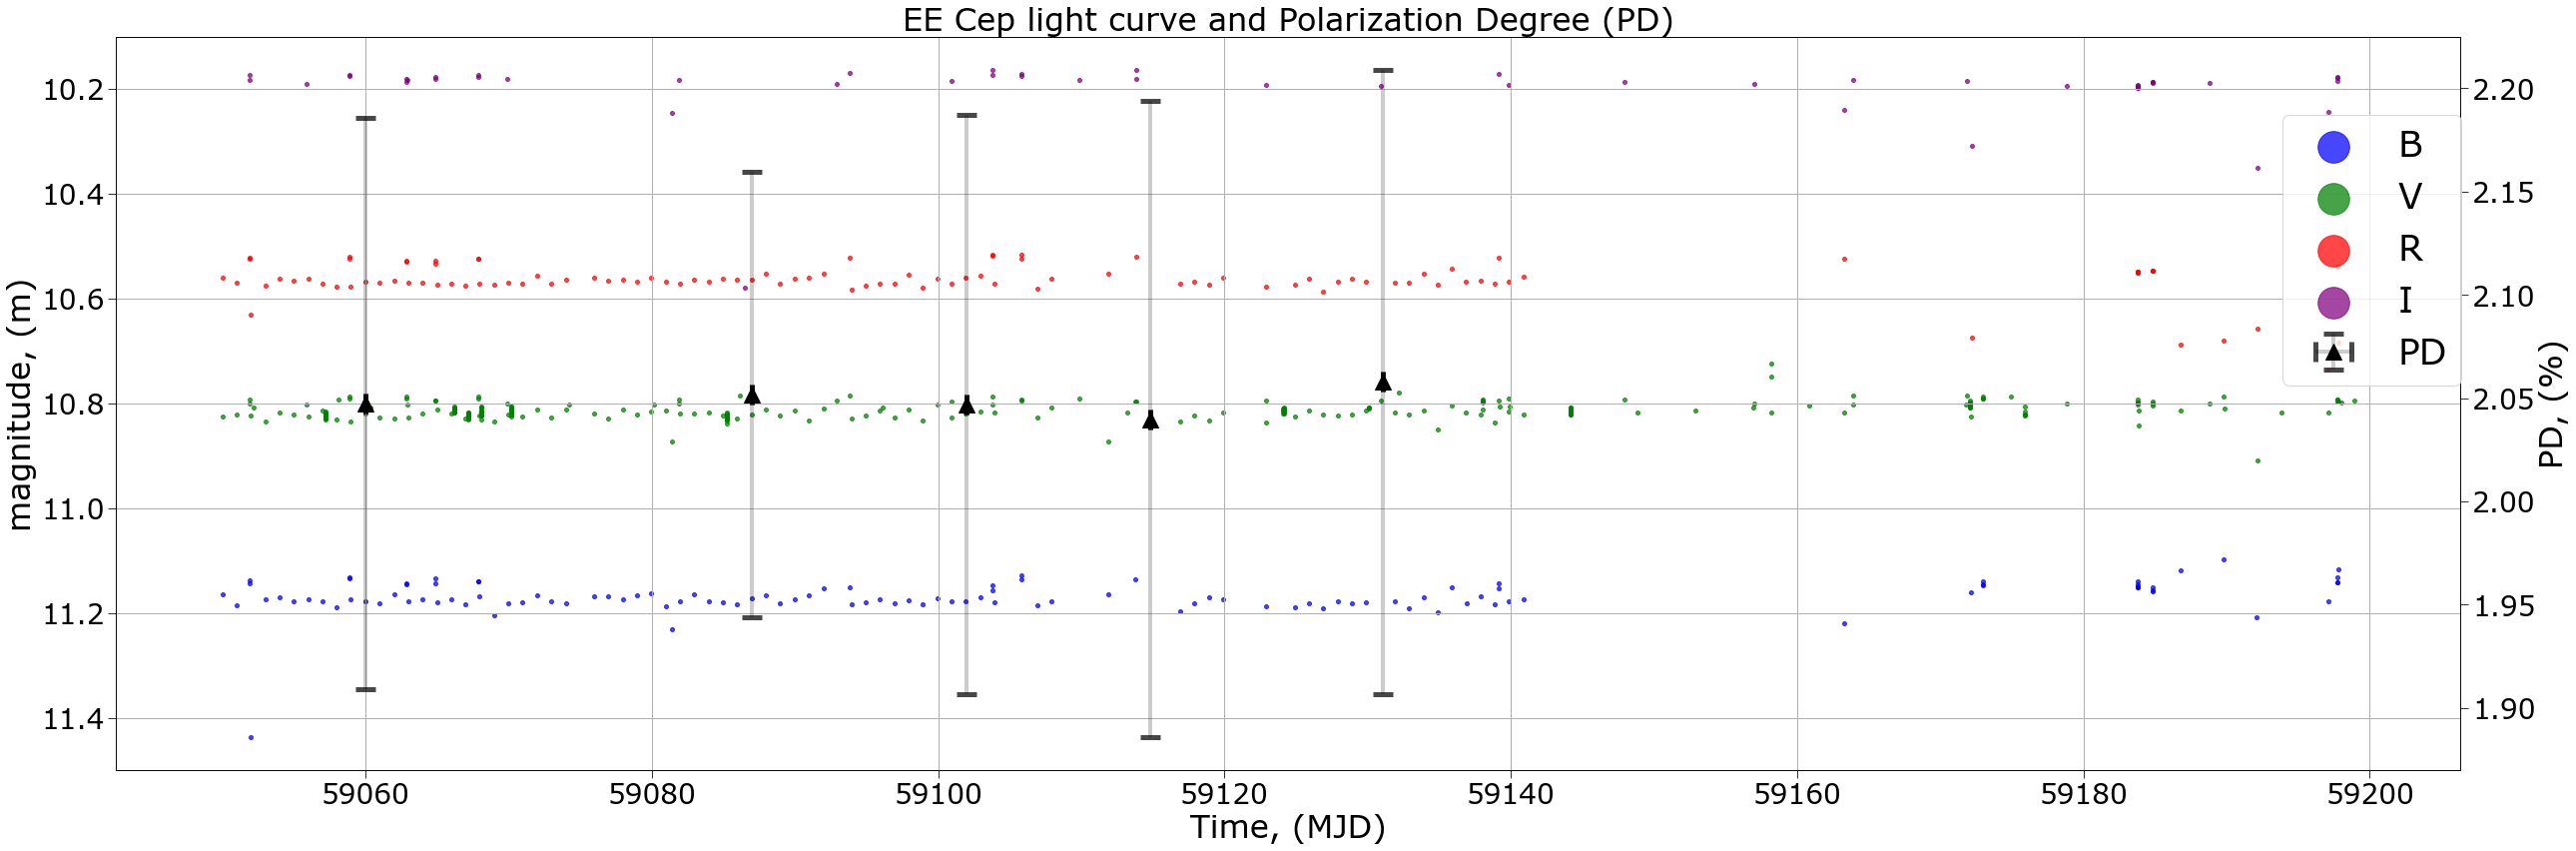

Reading: ee_cep_2014.txt


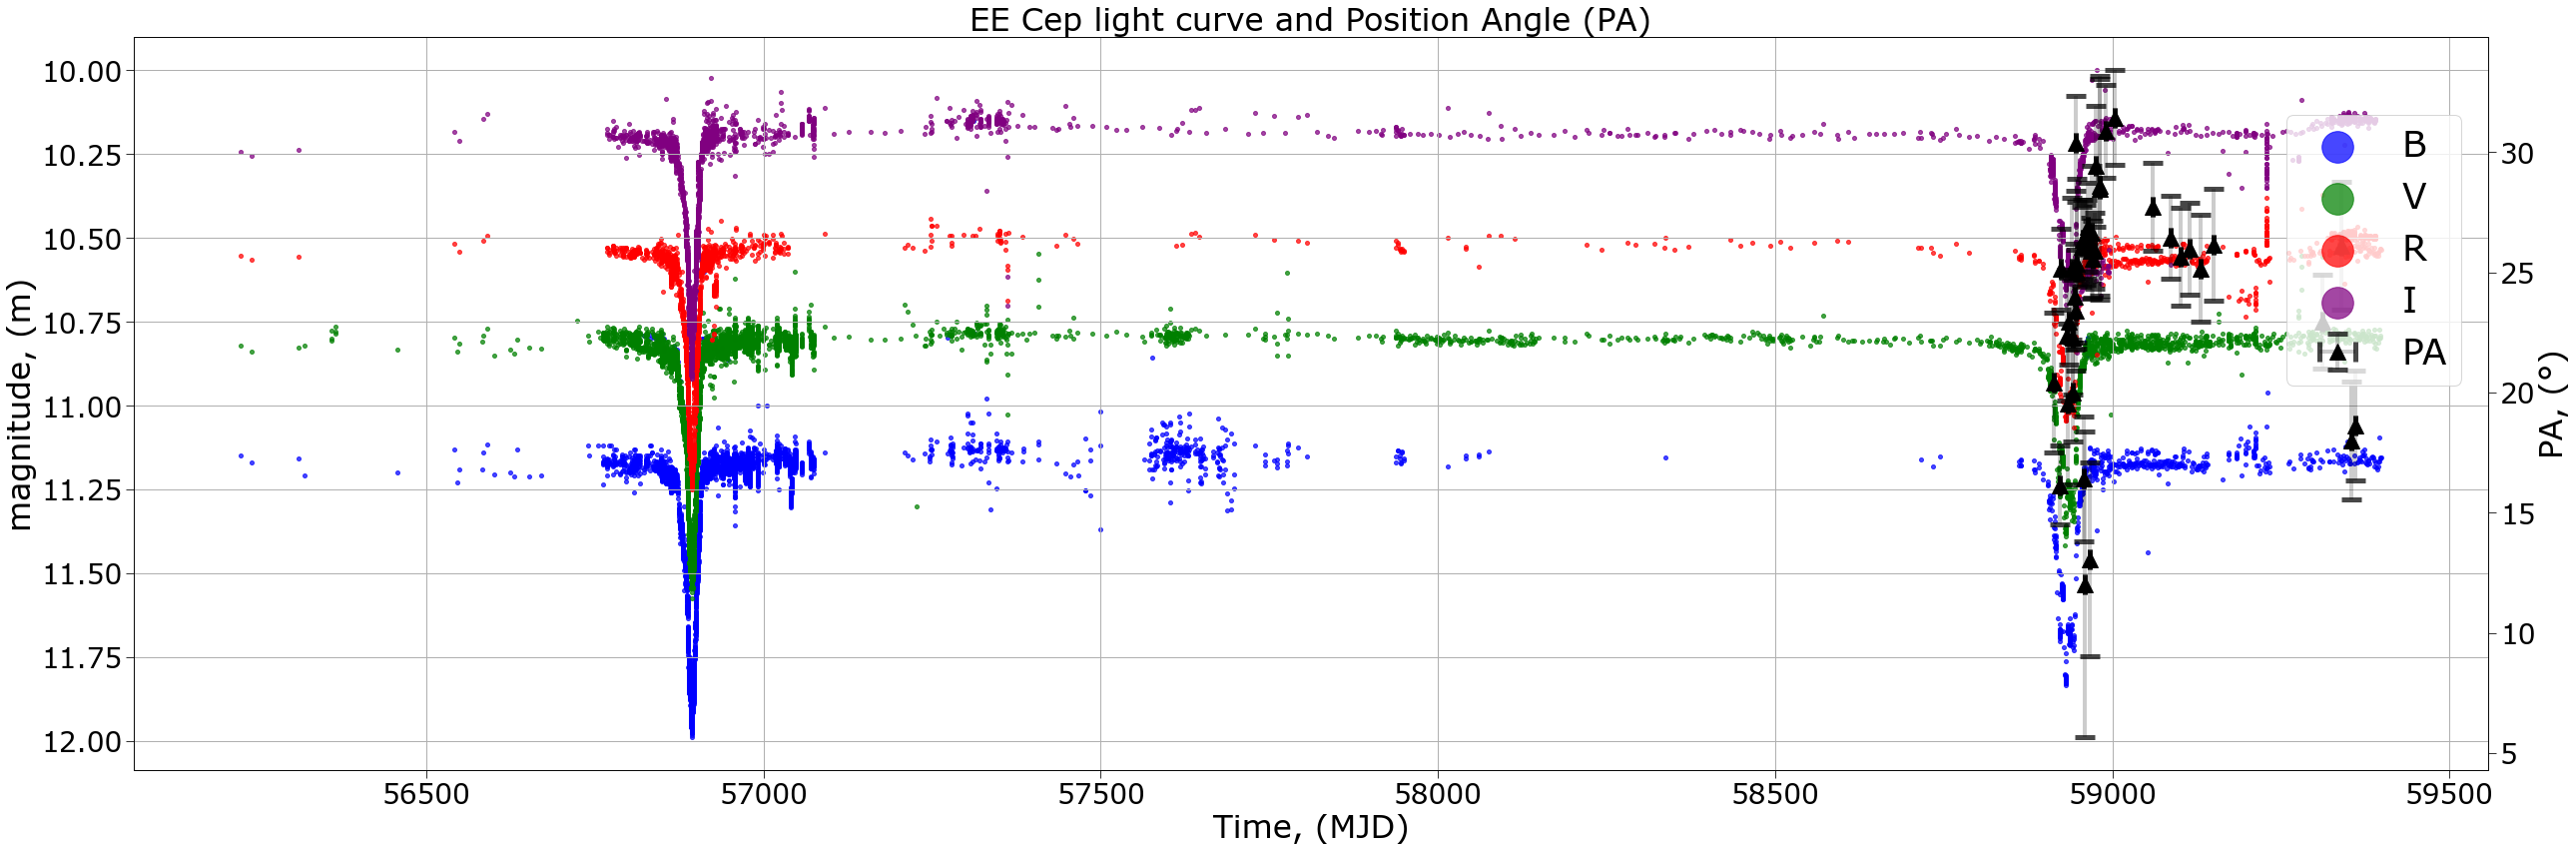

In [17]:
funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 59050 , 59200, False ,True, False, '^' ,'PD', False, 'title')
funcs_polarimetry.EECep_light_curve_based((EECep_pa, EECep_pa_err,  tm_pa), 50000 , 59400, False ,True, False, '^','PA', False, 'title')

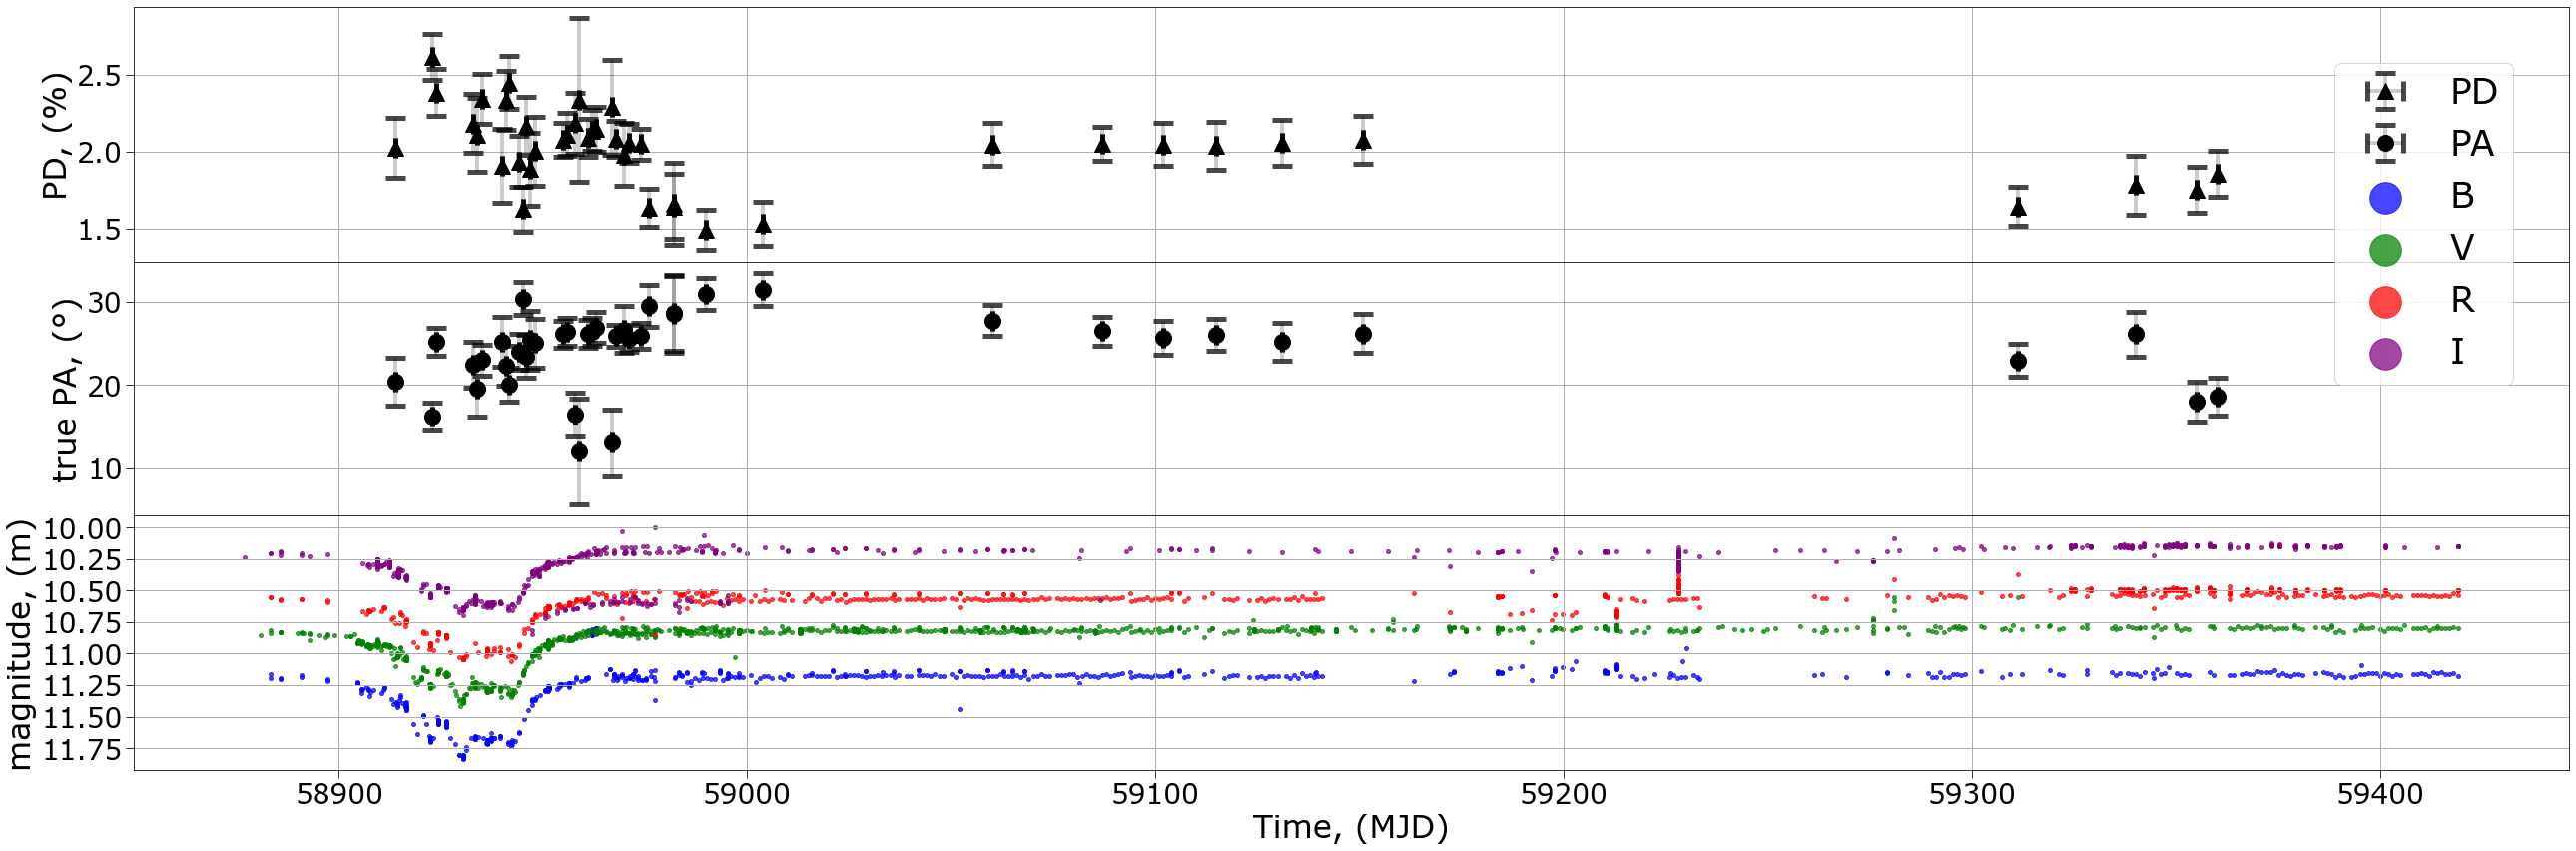

Reading: ee_cep_2014.txt


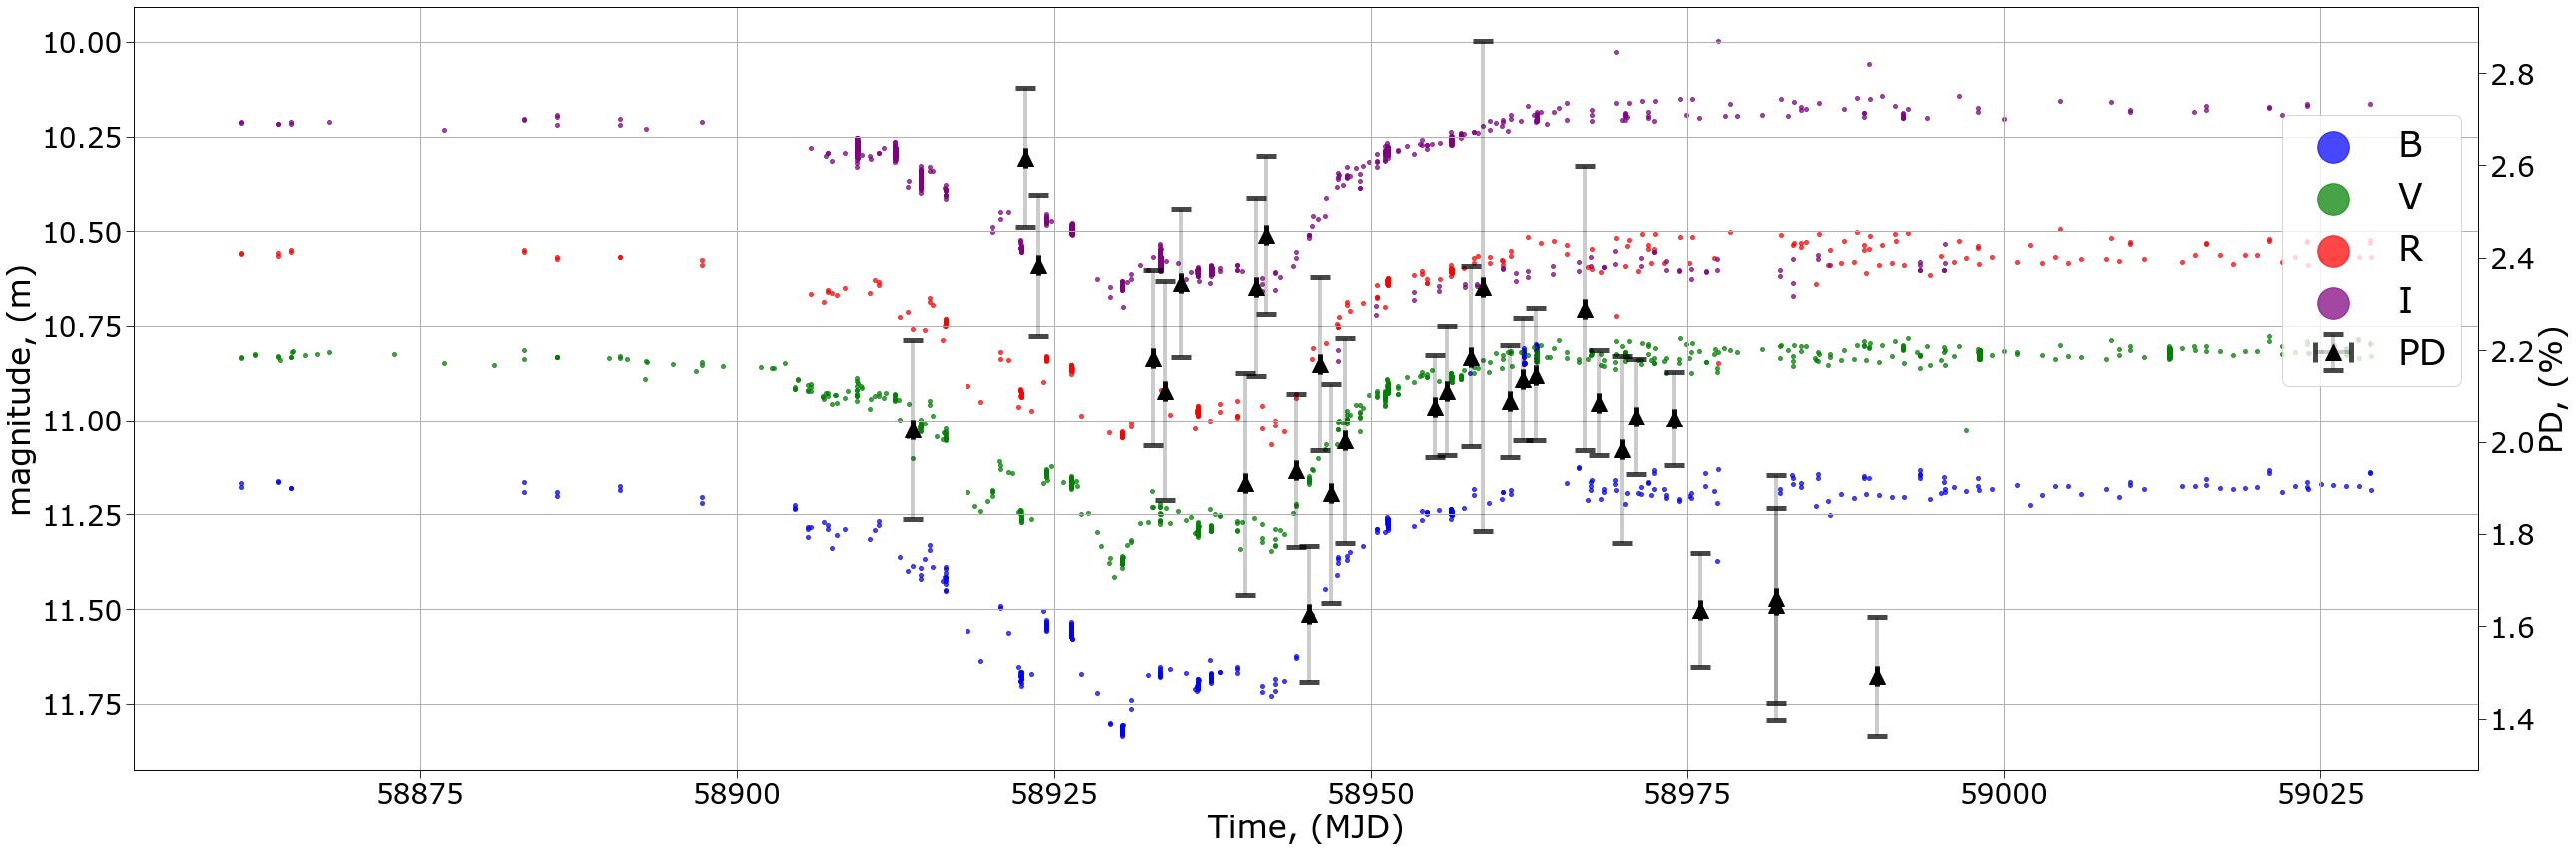

Reading: ee_cep_2014.txt


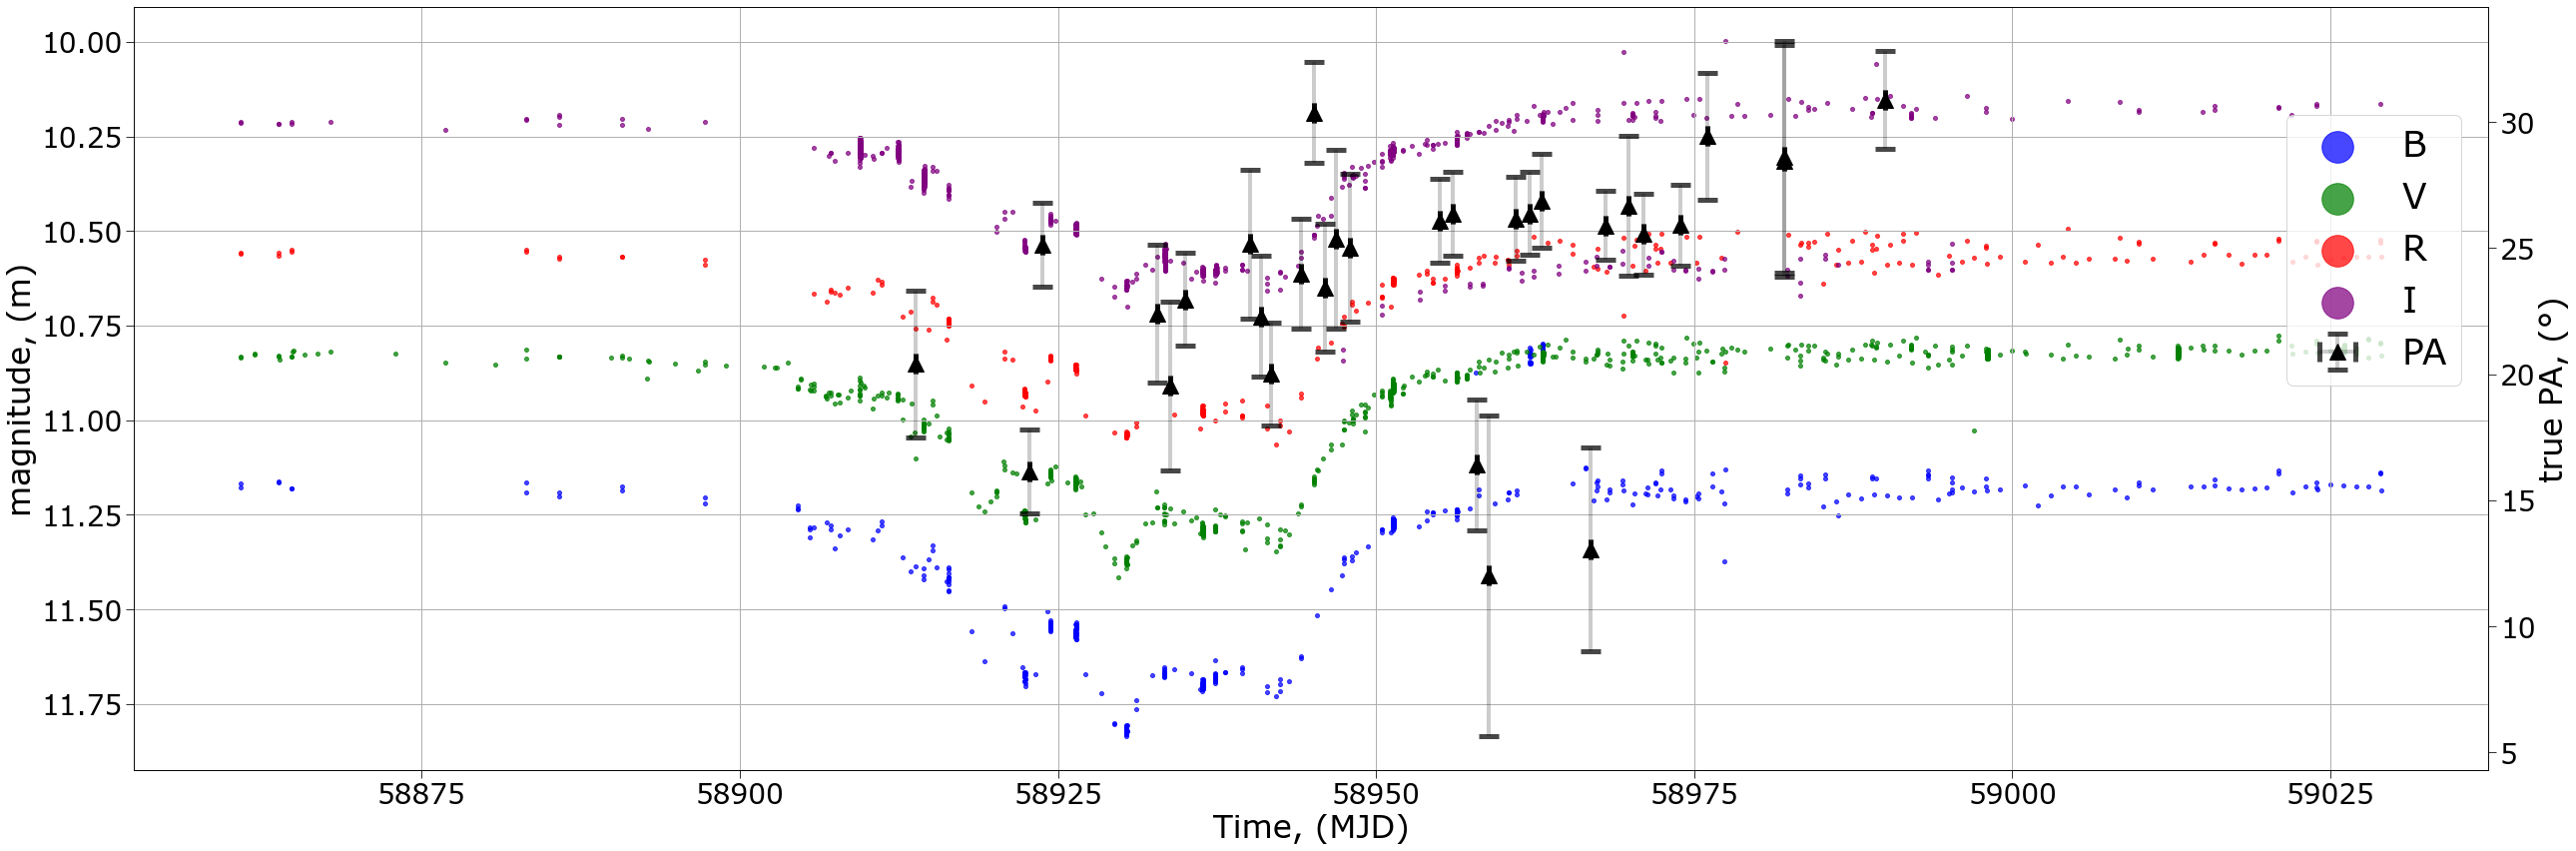

In [18]:
funcs_polarimetry.EECep_stacked_based((EECep_pd, EECep_pd_err,  tm_pd), (EECep_pa, EECep_pa_err,  tm_pa), 58880 , 59420, False ,True, False, 'o' , '^', True, False)

funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 58860 , 59030, False ,True, False, '^','PD', False, False)
funcs_polarimetry.EECep_light_curve_based((EECep_pa, EECep_pa_err,  tm_pa), 58860 , 59030, False ,True, False, '^','PA', True, False)